In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import copy
import missingno as msno
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read the CSV file
house_price=pd.read_csv('housing.csv')
house_price

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,OneFam,SLvl,Above_Average,1984,Typical,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,OneFam,One_Story,Average,1983,Typical,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,OneFam,SFoyer,Average,1992,Typical,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,OneFam,One_Story,Average,1974,Typical,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


In [3]:
#Split the data into Independent and Dependent Variable
x_house_price=house_price.iloc[:, :-1]
y_house_price=house_price['Sale_Price']

In [4]:
#Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_house_price, y_house_price, test_size=0.2, random_state=22212311)

## EDA

In [5]:
#Divide the columns among categorical and numerical data types
numerical=list()
categorical=list()
for i in x_train.columns:
    if x_train[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

In [6]:
#Hard Code of level of measurements
ordinal=['Overall_Cond','Exter_Cond']
nominal=['Bldg_Type','House_Style']
interval=['Longitude','Latitude']
ratio=['Year_Built','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces','Lot_Frontage','Lot_Area','Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF']
discrete=['Year_Built','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']
continous=['Lot_Frontage','Lot_Area','Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF','Longitude','Latitude']

In [7]:
#Descriptive Statitics of train
x_train.describe(exclude='O')

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,55.446114,9884.235233,1969.407772,1025.165803,1129.512953,343.328497,1.533161,0.383420,2.862176,1.036788,0.617098,-93.642088,42.033862
std,33.309278,6912.536554,29.661247,401.460287,359.931396,424.831082,0.539943,0.501046,0.815651,0.193717,0.653592,0.025968,0.018145
min,0.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.692867,41.986498
25%,39.250000,7297.250000,1952.000000,789.500000,864.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-93.660321,42.021534
50%,60.000000,9318.500000,1971.500000,970.000000,1055.500000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,-93.640058,42.034584
75%,76.000000,11340.750000,1998.000000,1242.000000,1342.000000,711.750000,2.000000,1.000000,3.000000,1.000000,1.000000,-93.621504,42.048557
max,313.000000,164660.000000,2010.000000,3206.000000,2696.000000,1836.000000,4.000000,2.000000,6.000000,3.000000,4.000000,-93.577427,42.063381


In [8]:
#Descriptive Statitics of test
y_train.describe(exclude='O')

count      1930.000000
mean     175653.467358
std       70138.568922
min       35000.000000
25%      129500.000000
50%      159000.000000
75%      205000.000000
max      615000.000000
Name: Sale_Price, dtype: float64

In [9]:
#Calculate the skewness and kurtosis of each numerical variable
for i in numerical:
    skewness = skew(x_train[i])
    kurt = kurtosis(x_train[i])
    print("Skewness:", skewness,"Kurtosis:", kurt)

Skewness: -0.05834783876055924 Kurtosis: 1.5203290326644385
Skewness: 12.113353074364936 Kurtosis: 245.94668250978864
Skewness: -0.6004337059584012 Kurtosis: -0.4172443507347743
Skewness: 0.46111055395740375 Kurtosis: 1.462993599228482
Skewness: 0.8826142261341867 Kurtosis: 0.9055707463602927
Skewness: 0.7674151148960067 Kurtosis: -0.685916910667399
Skewness: 0.27335490924774936 Kurtosis: -0.5168997153912502
Skewness: 0.6520649936131968 Kurtosis: -1.1521101776523384
Skewness: 0.18889584072650256 Kurtosis: 1.3147969728189404
Skewness: 4.915770666482035 Kurtosis: 25.090825559407204
Skewness: 0.7204486698452804 Kurtosis: 0.1343605180152827
Skewness: -0.3480167463934906 Kurtosis: -0.9336040037440085
Skewness: -0.5070591676366214 Kurtosis: -0.10830904916997008


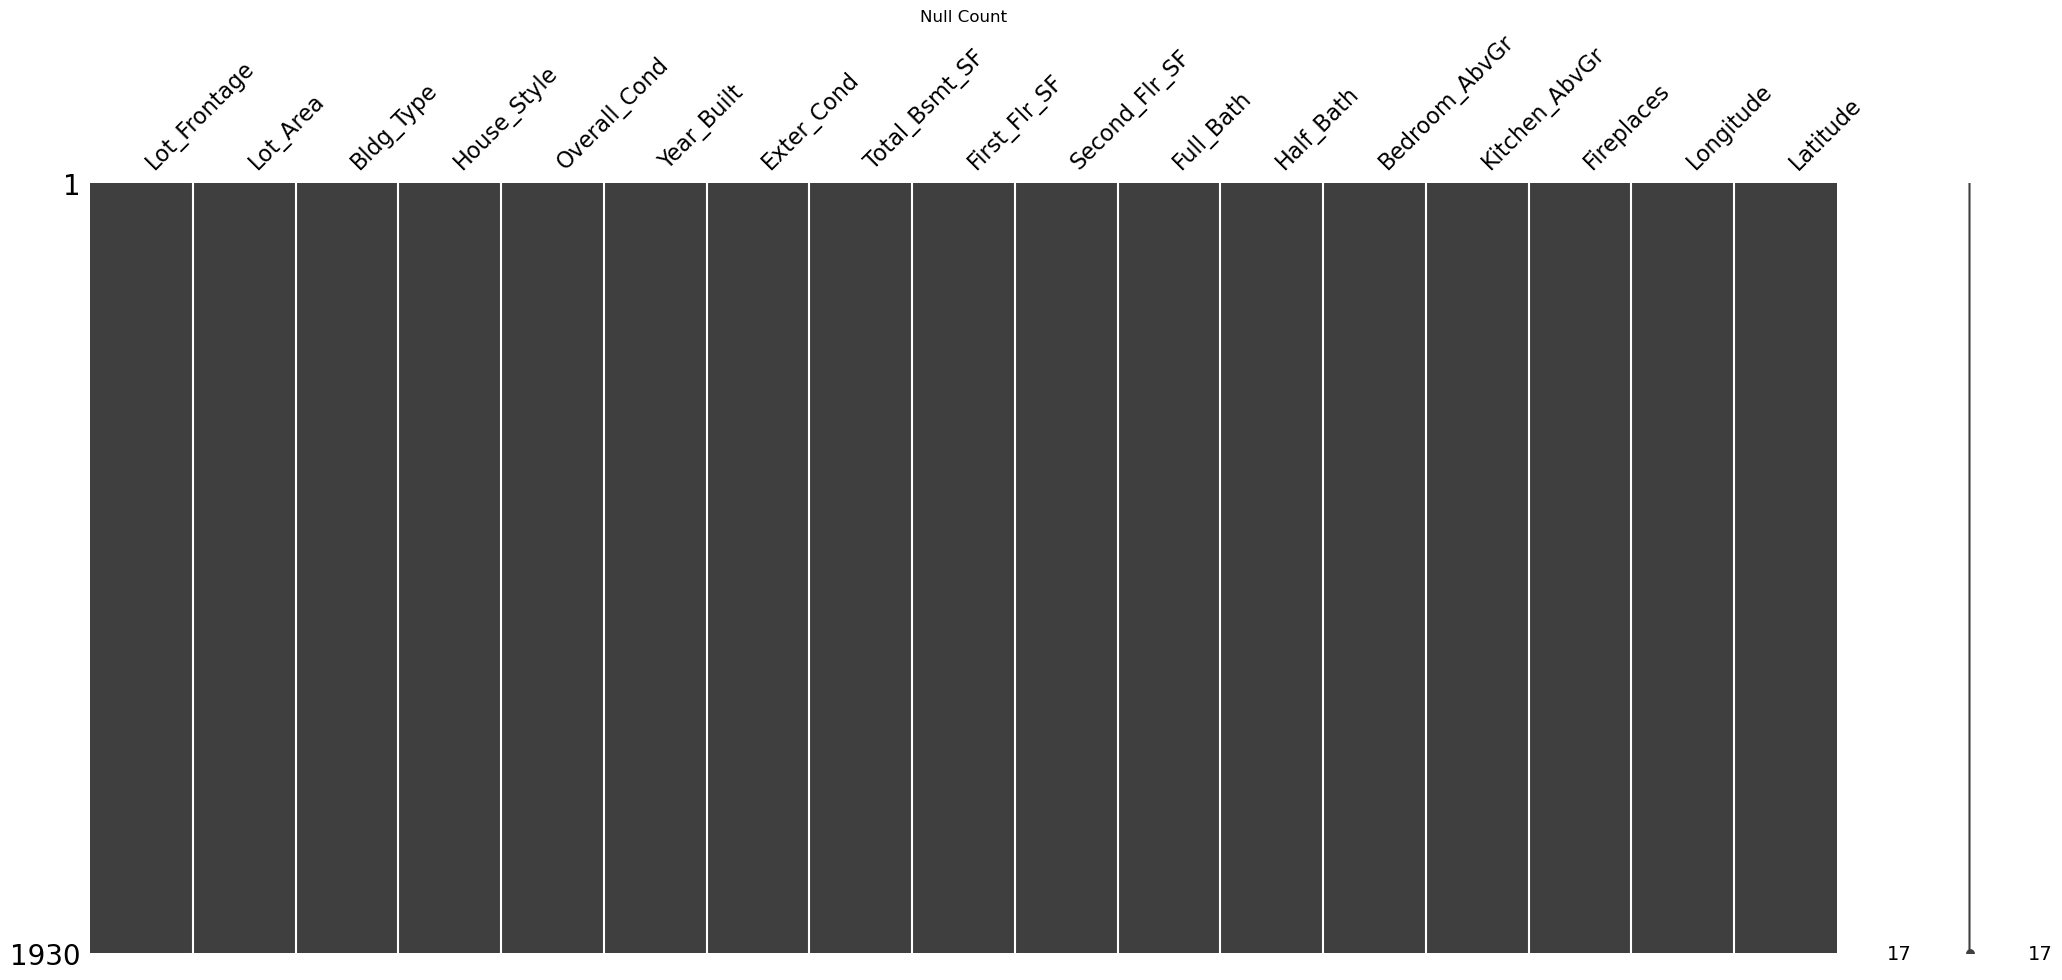

In [10]:
#Visualise the Null Values
msno.matrix(x_train)
plt.title('Null Count')
plt.show()

In [11]:
#Count the null values column wise
x_train.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
dtype: int64

In [12]:
##Count the duplicate rows
x_train.duplicated().sum()

0

C:\Users\Dell\AppData\Local\Temp\ipykernel_5764\4097817271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_price.corr(), cmap="inferno", annot=True,fmt='.1f')


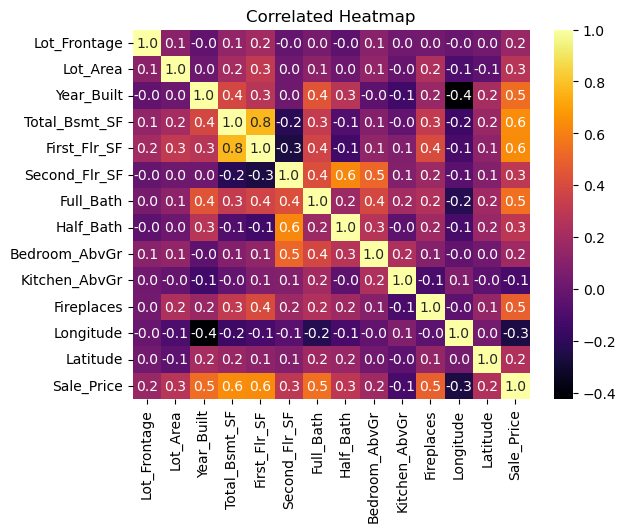

In [13]:
#Correlated Heatmap
sns.heatmap(house_price.corr(), cmap="inferno", annot=True,fmt='.1f') 
plt.title('Correlated Heatmap')
plt.show()

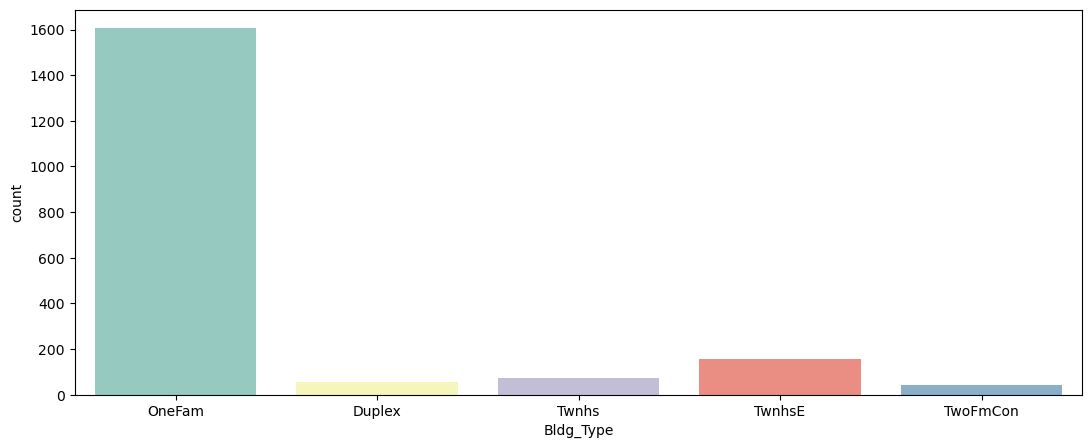

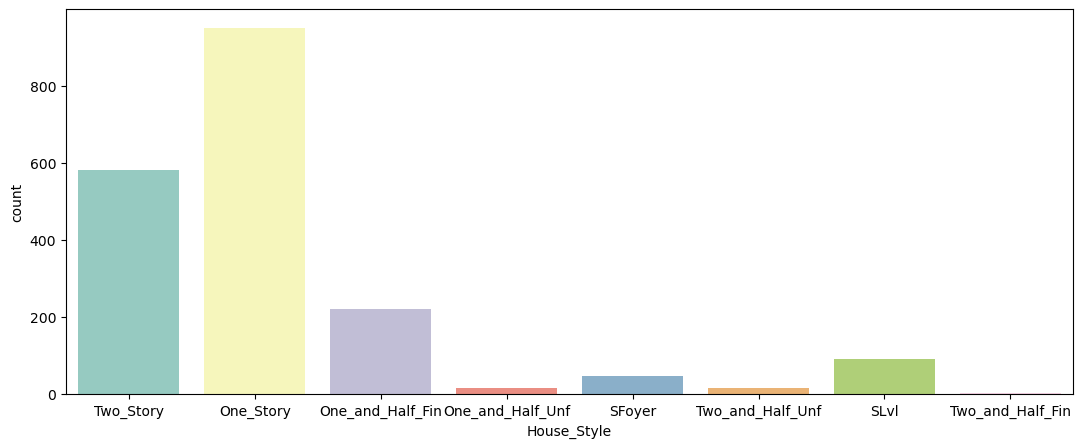

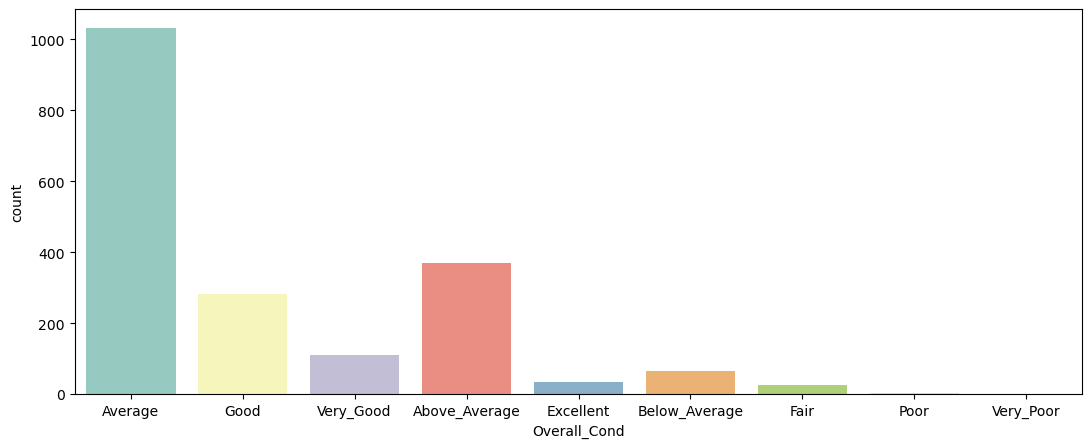

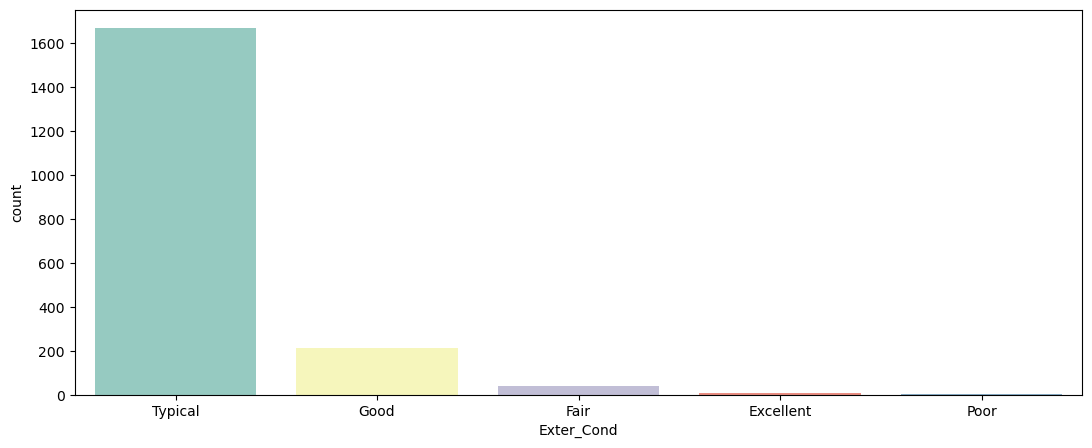

In [14]:
#countplot for categorical data
for i in categorical:
    plt.figure(figsize=(13, 5))
    sns.countplot(x_train,x=i,palette='Set3')
    plt.show()

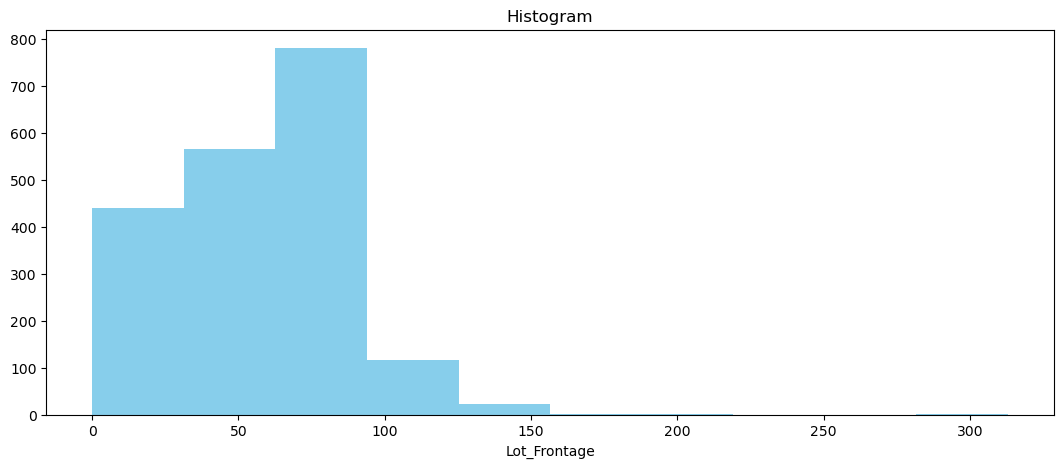

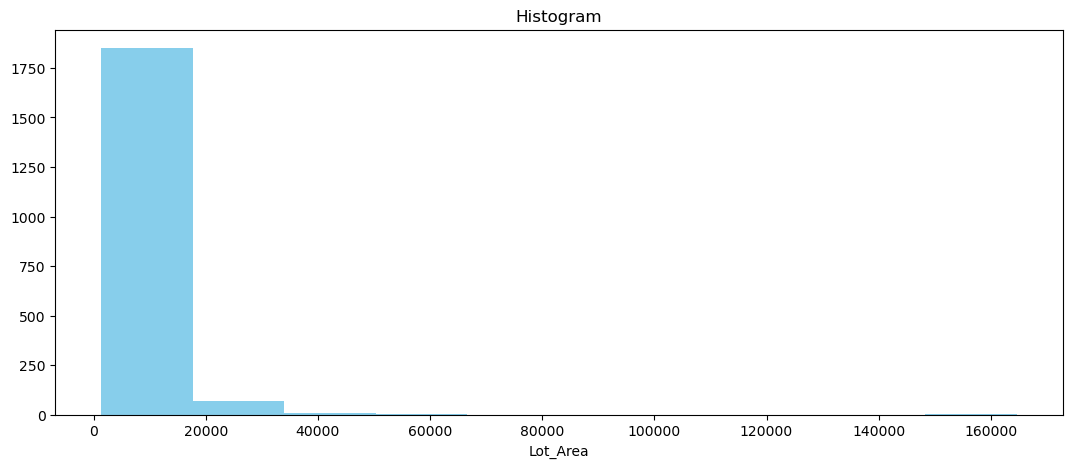

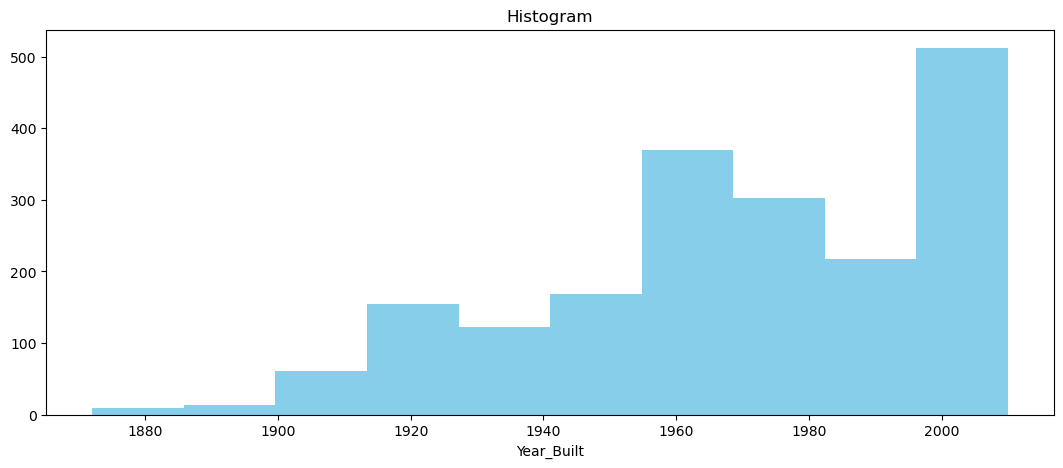

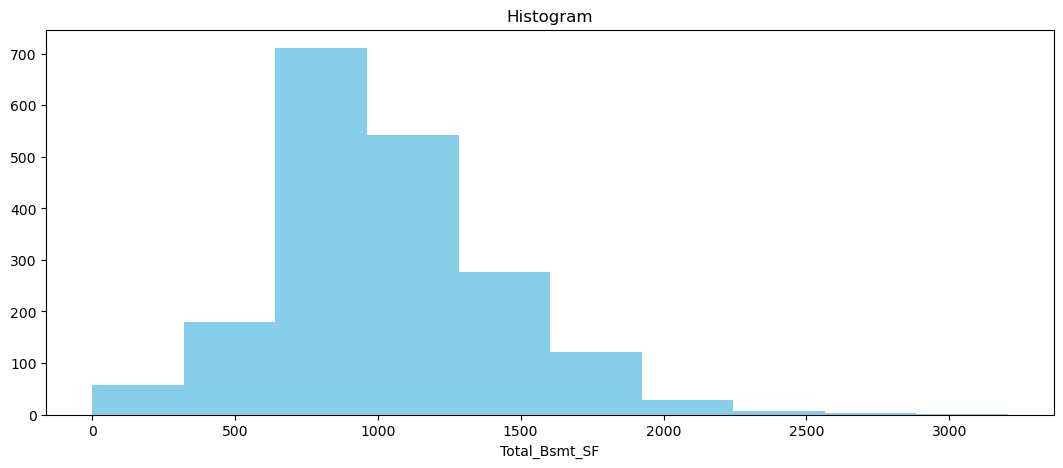

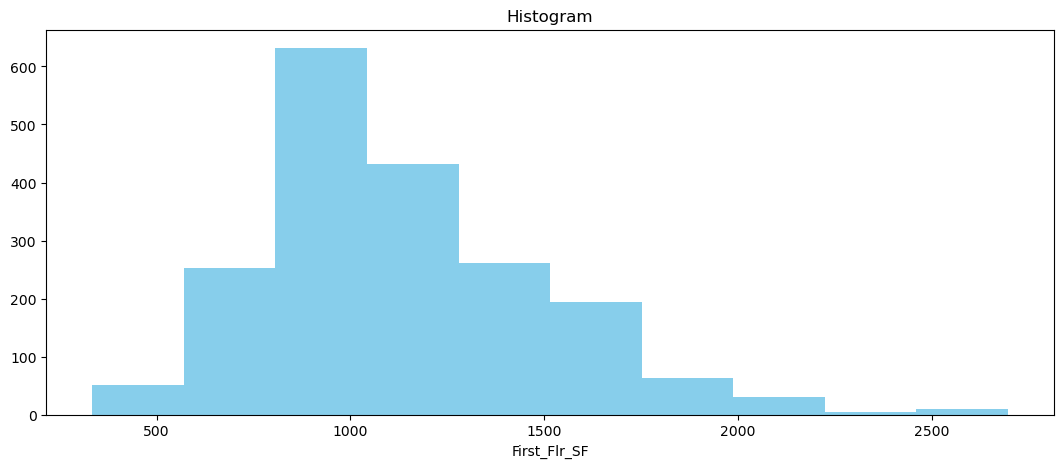

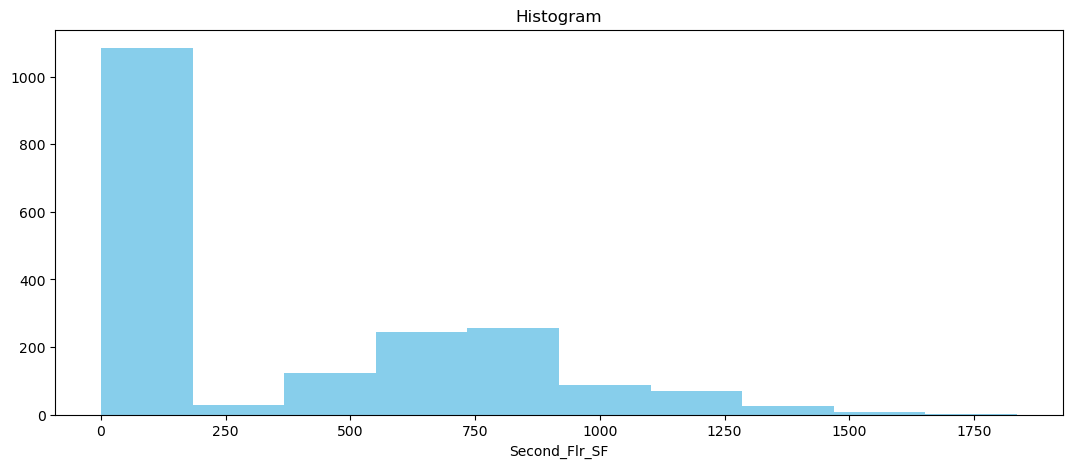

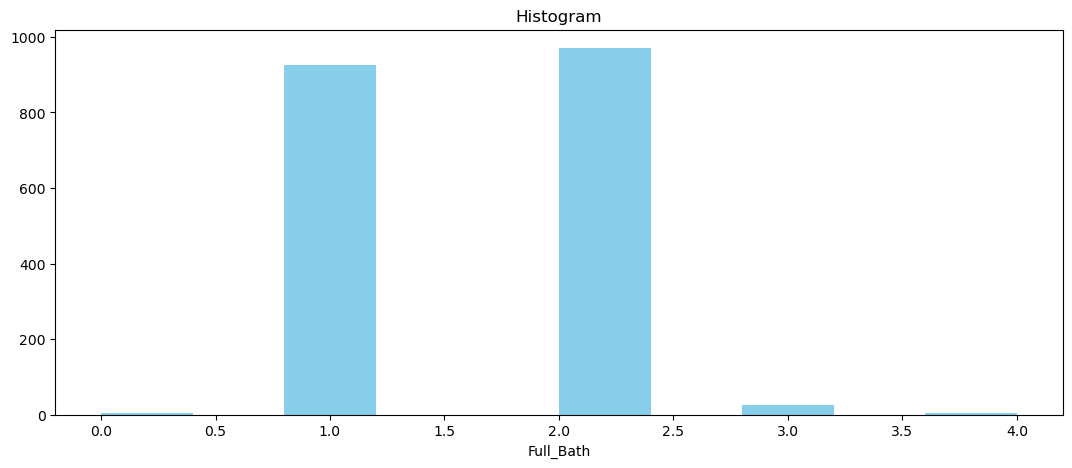

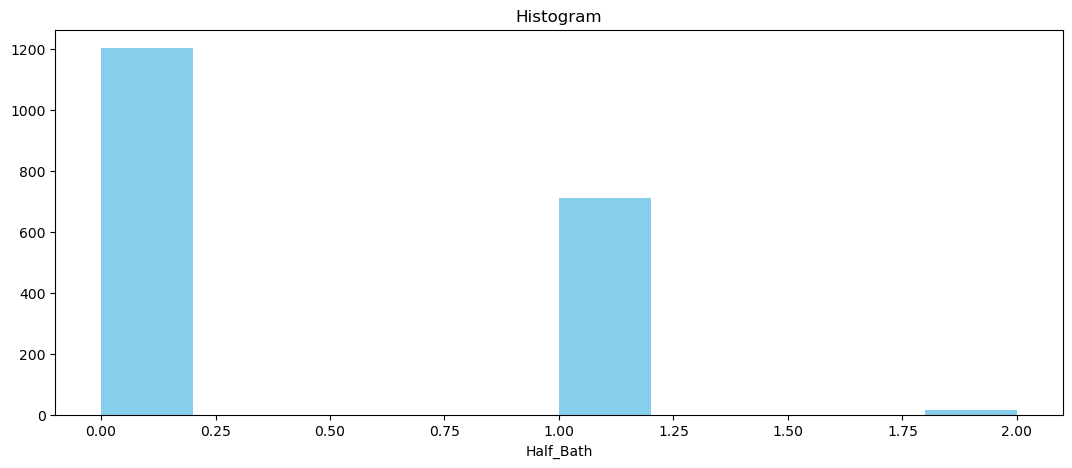

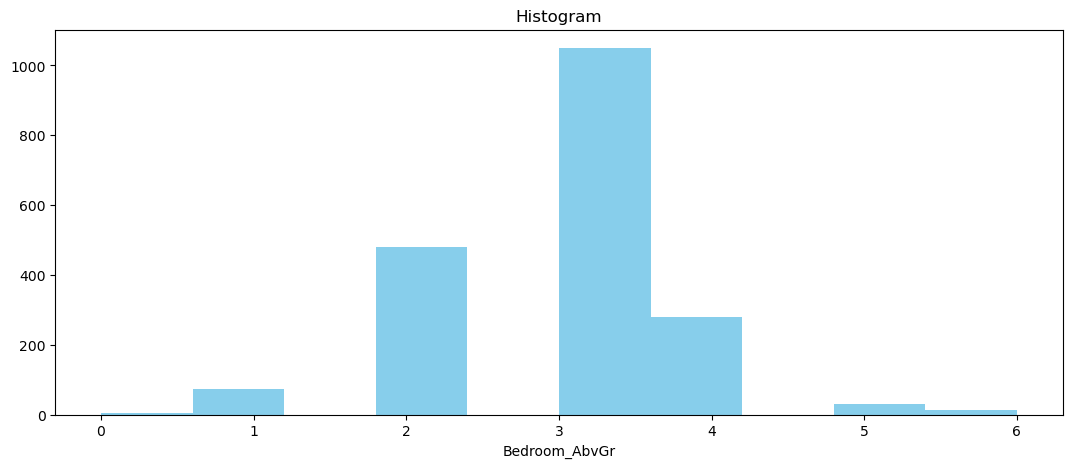

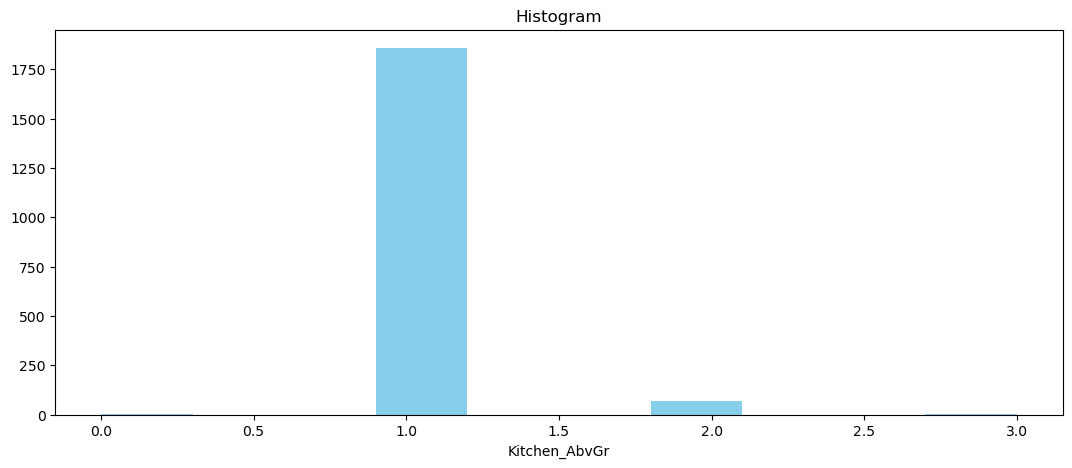

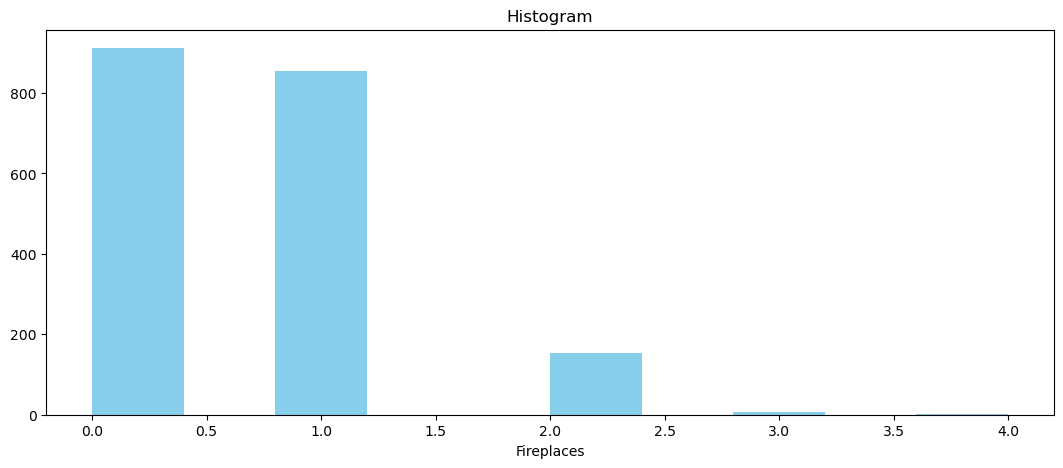

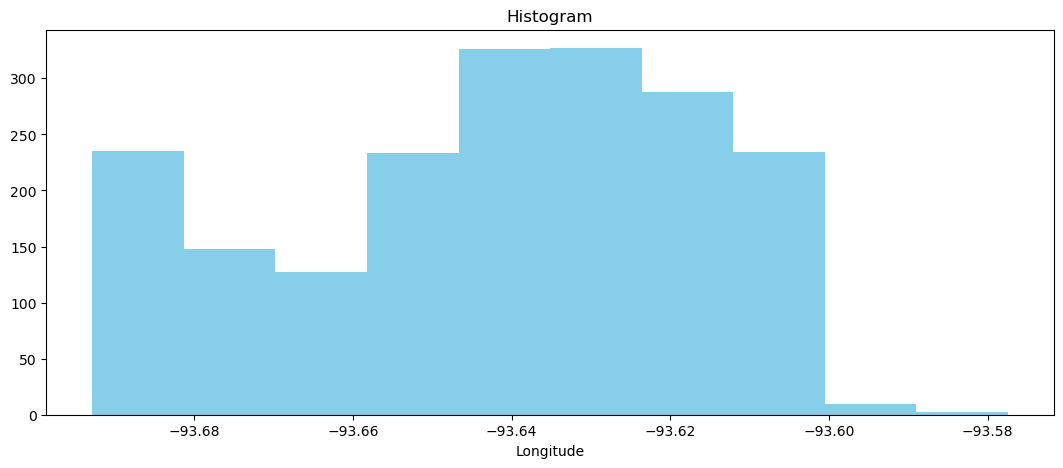

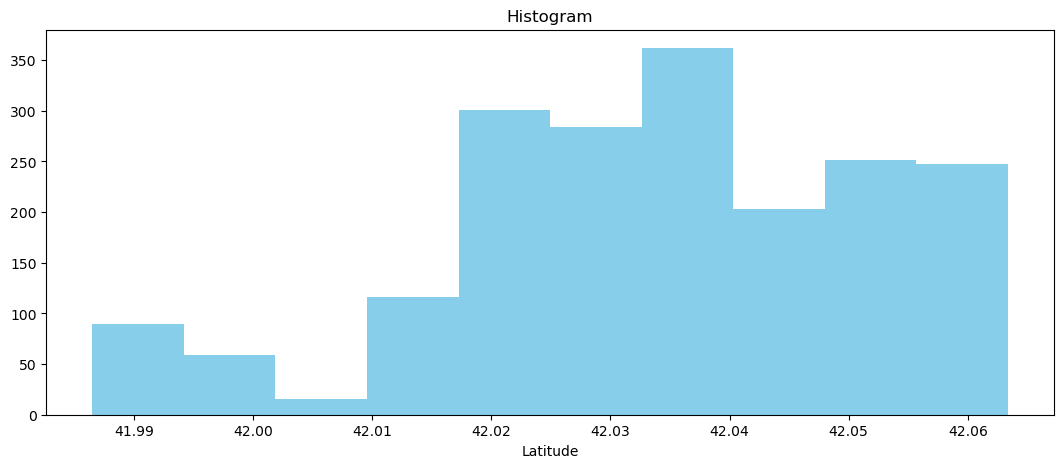

In [15]:
#Histogram for Numerical data
for i in numerical:
    plt.figure(figsize=(13, 5))  
    plt.hist(x_train[i],color='skyblue') 
    plt.title('Histogram')  
    plt.xlabel(i)
    plt.show()

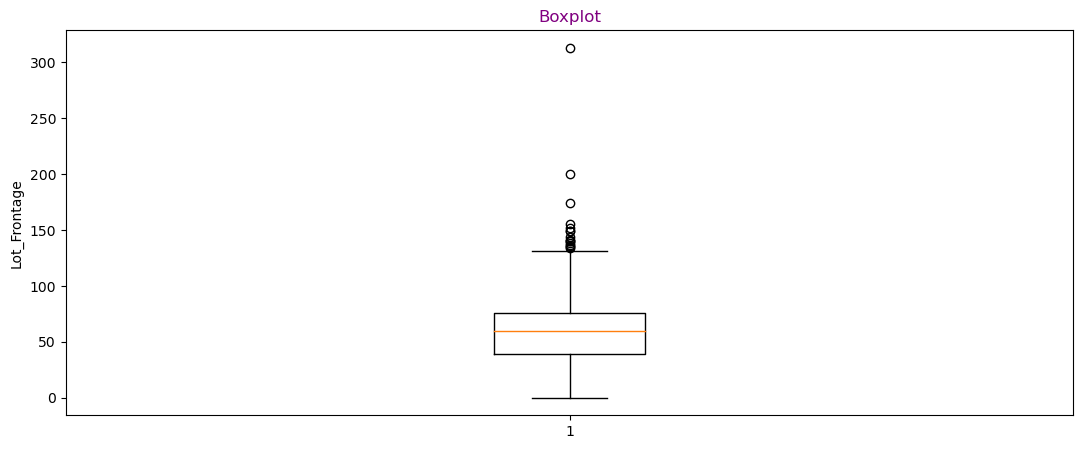

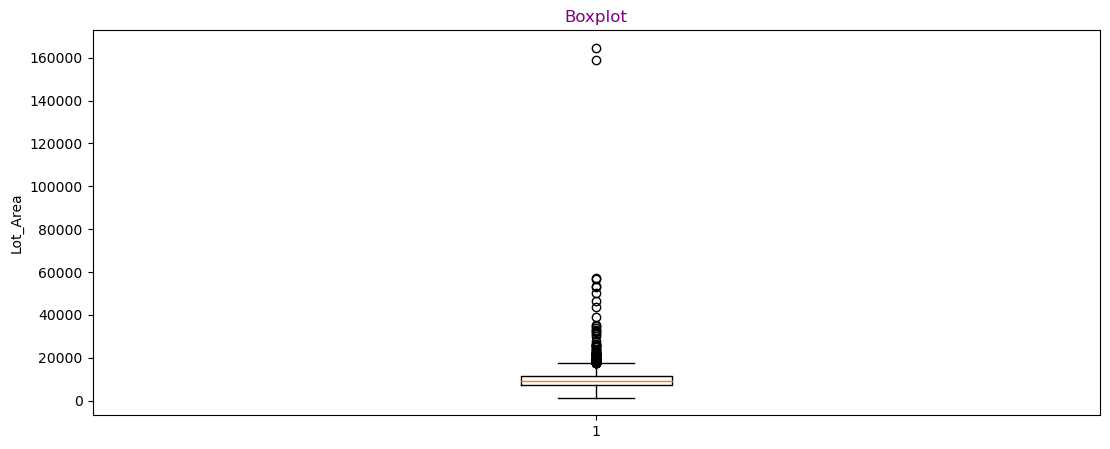

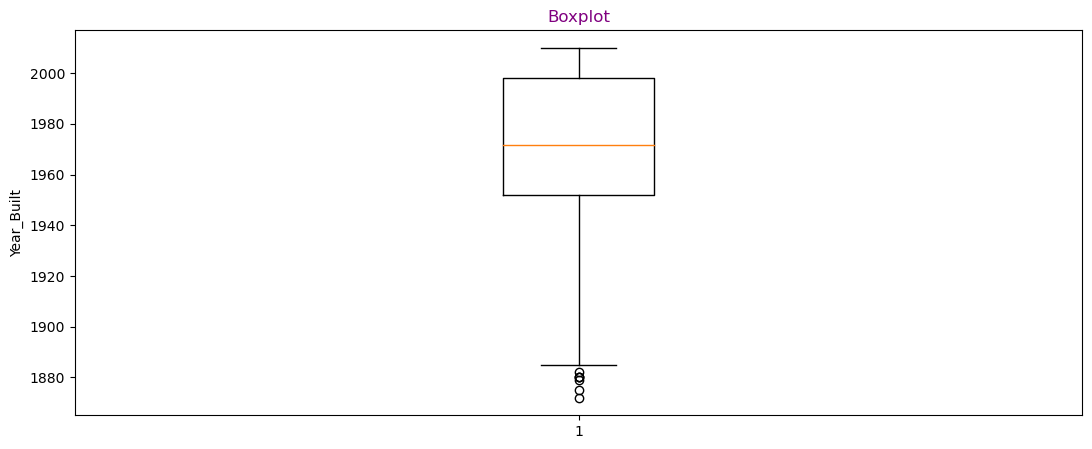

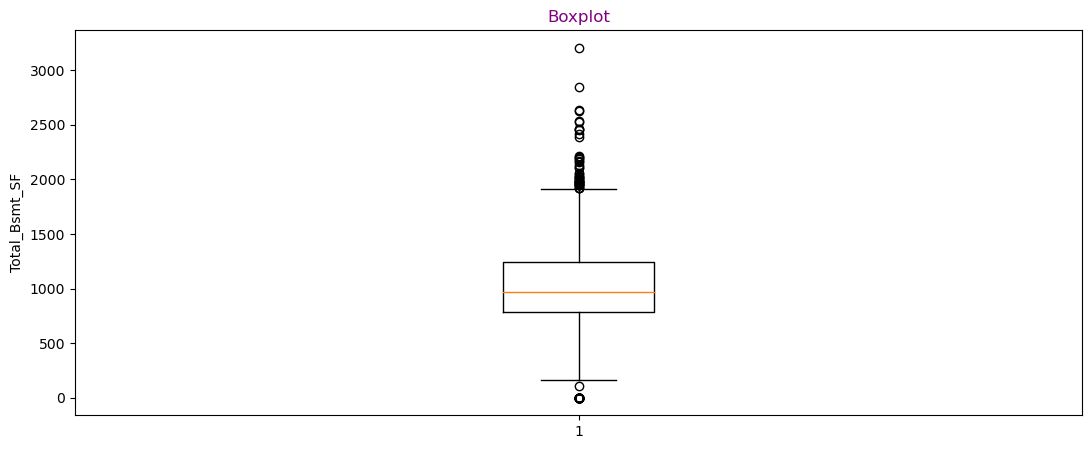

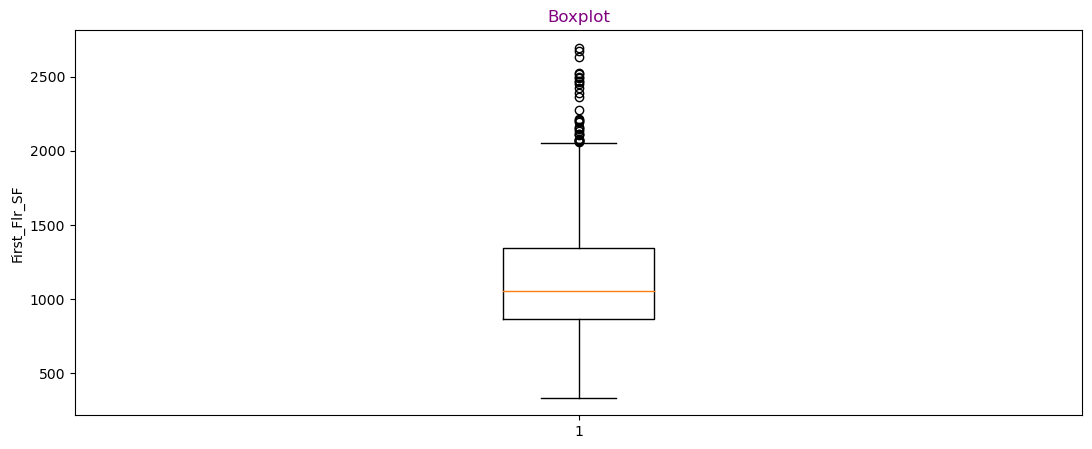

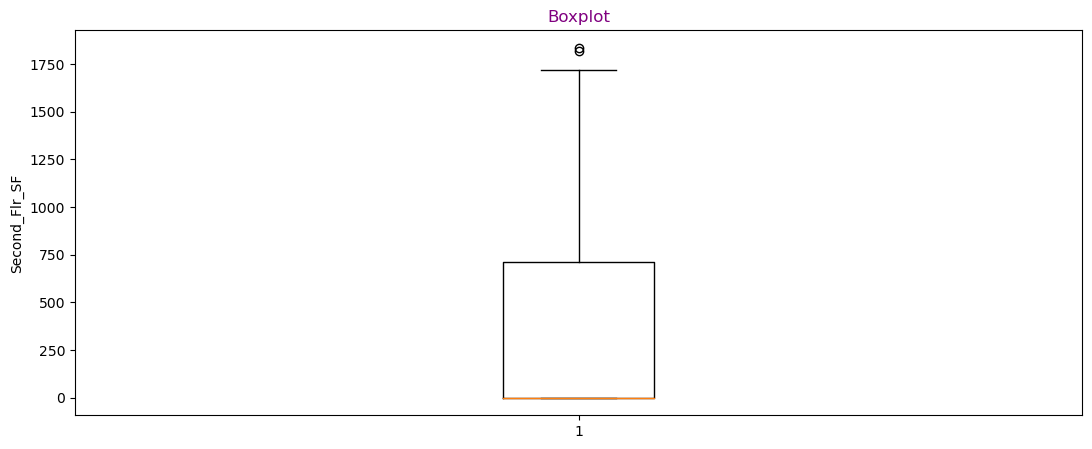

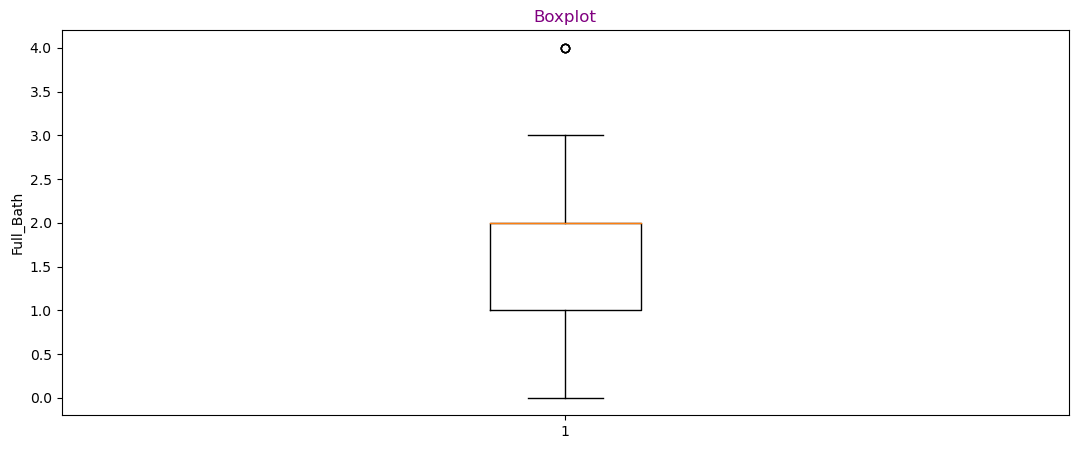

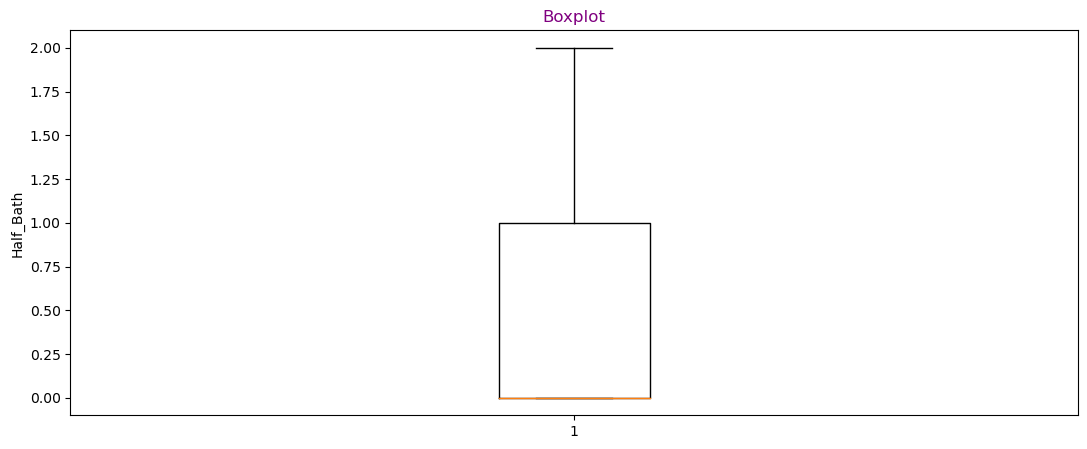

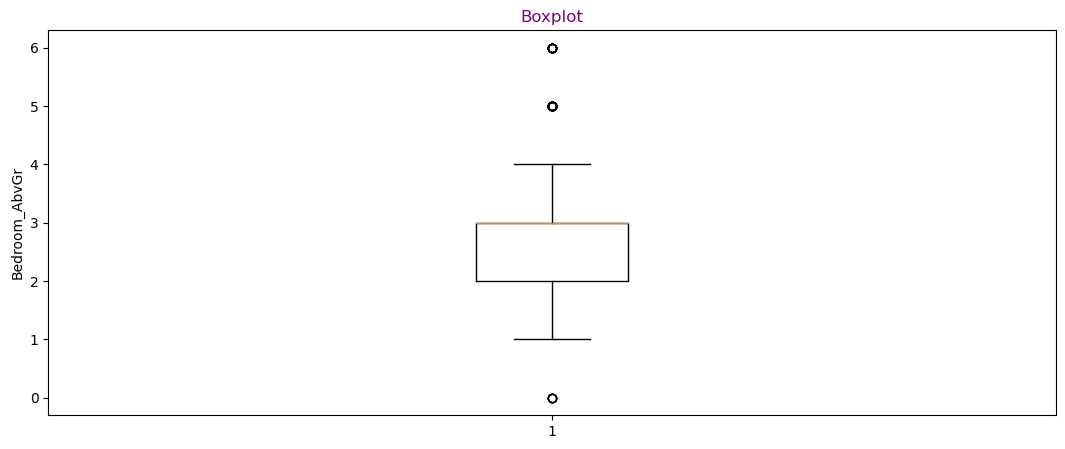

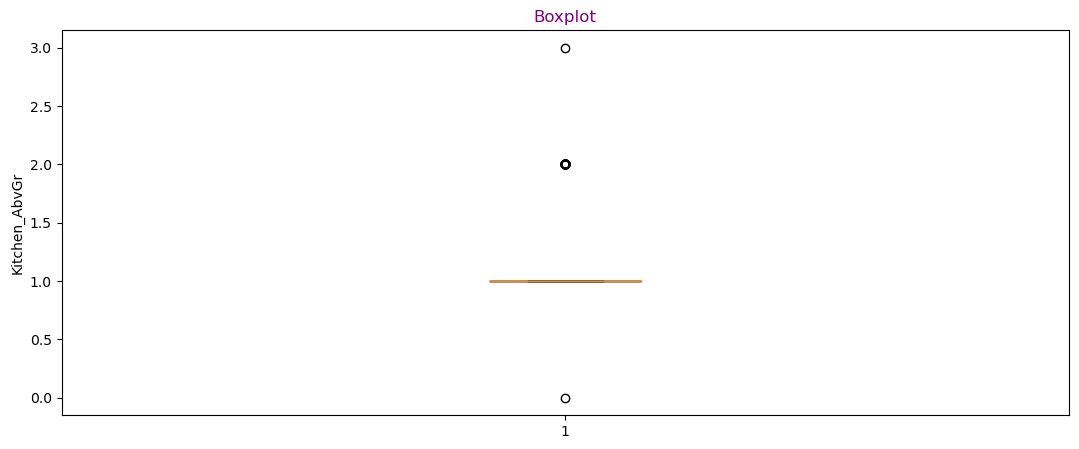

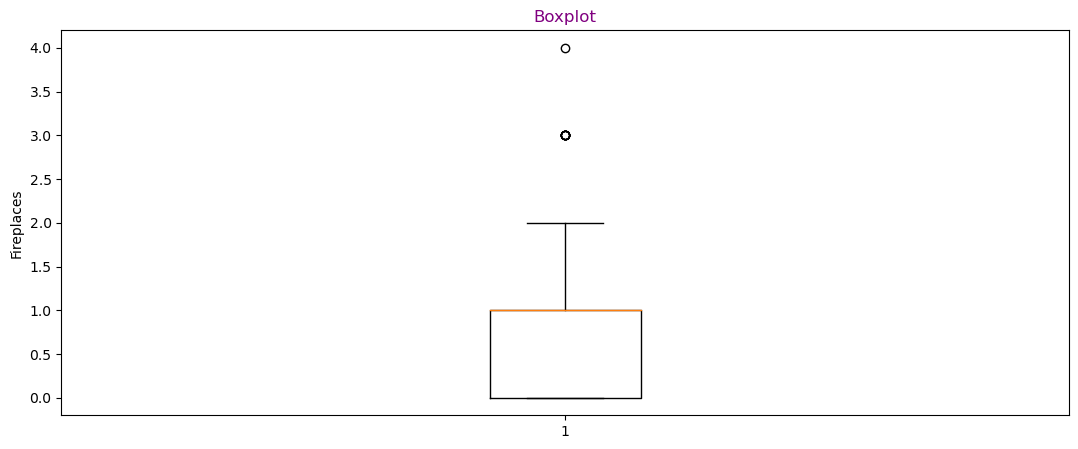

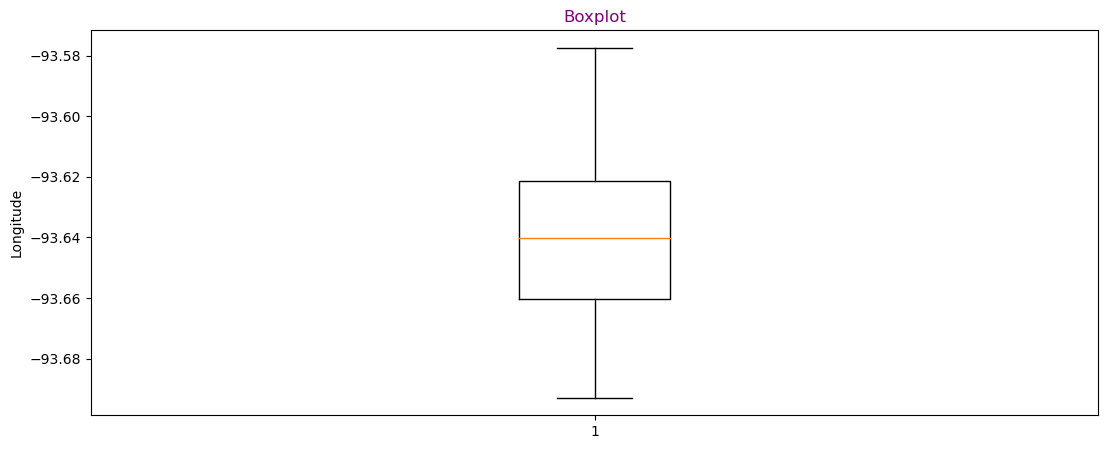

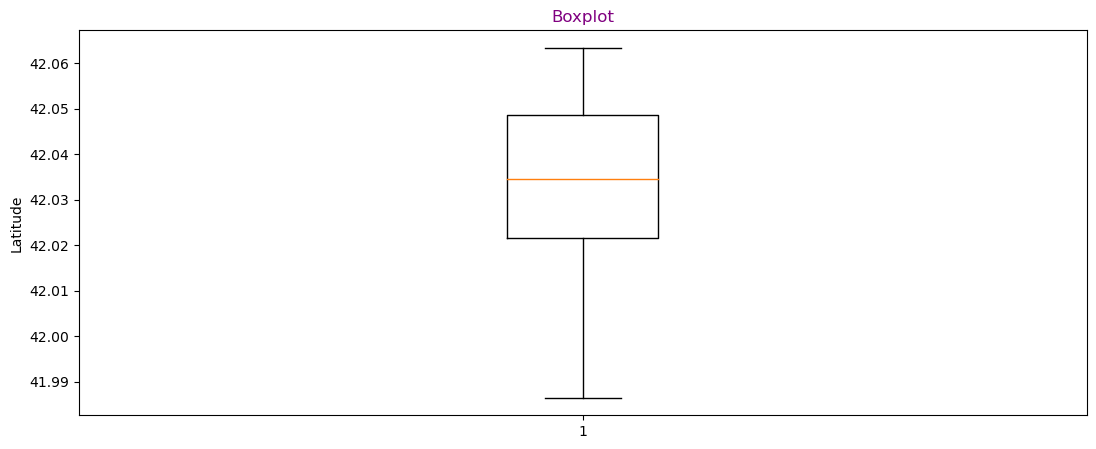

In [16]:
#Boxplot for numerical data
for i in numerical:
    plt.figure(figsize=(13, 5))
    plt.boxplot(x_train[i])
    plt.title('Boxplot',color='purple')
    plt.ylabel(i)
    plt.show()

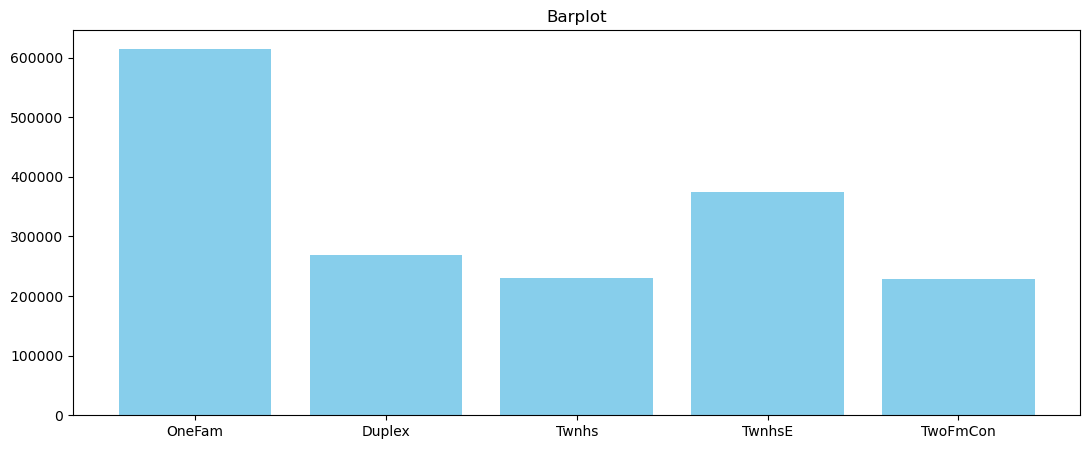

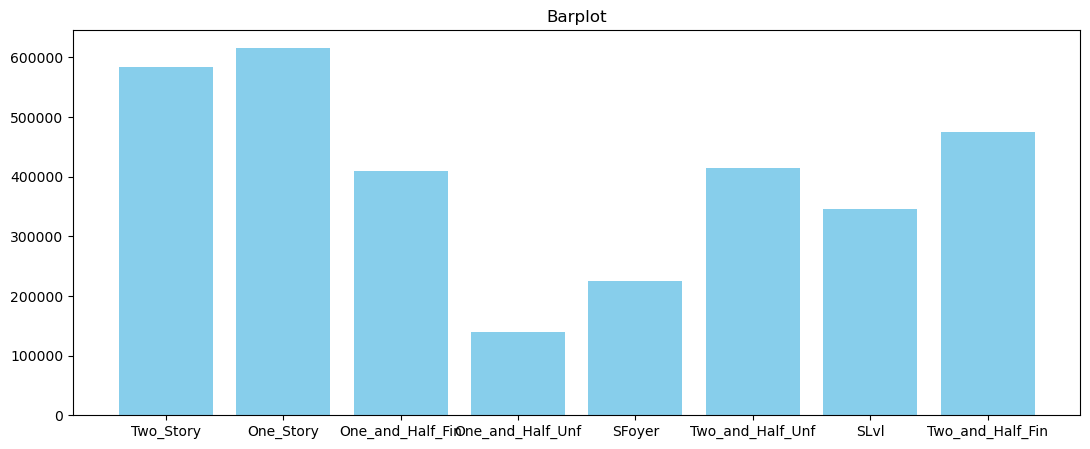

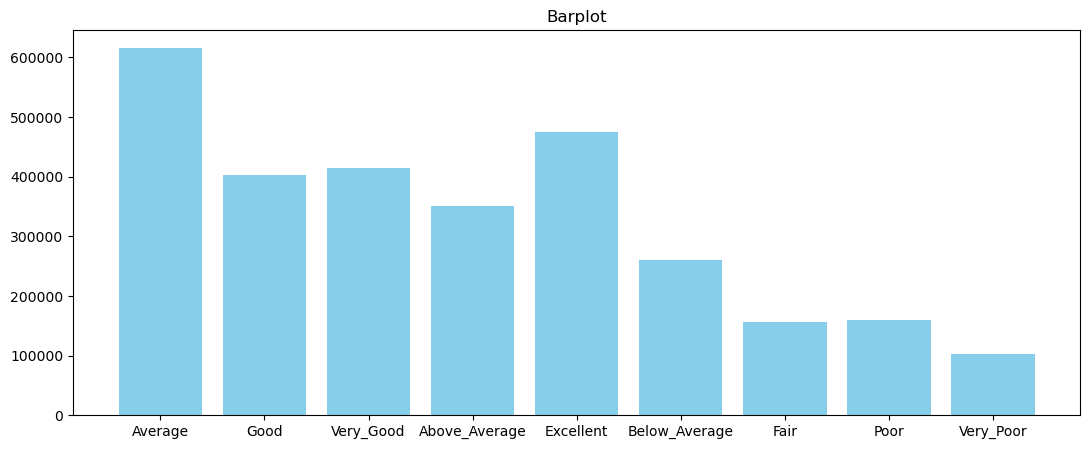

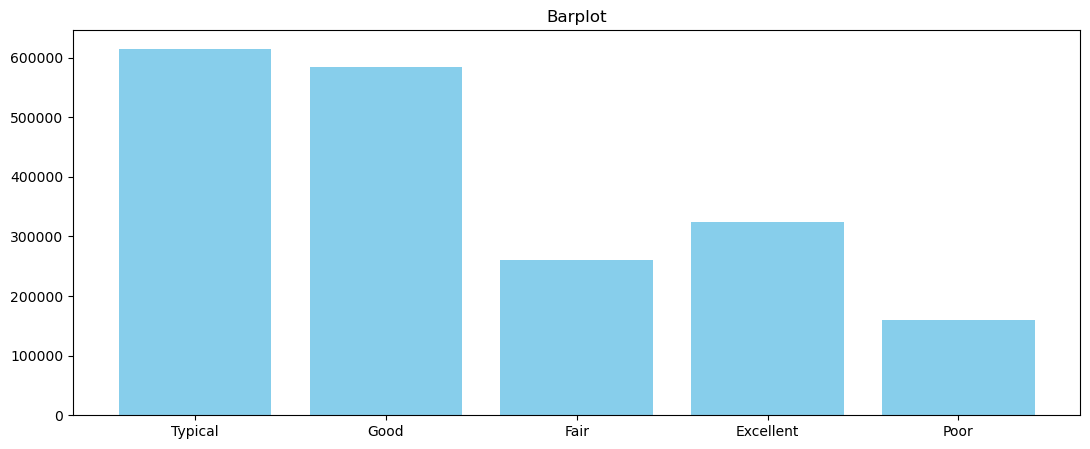

In [17]:
#Barplot to find relation between categorical data and sale price
for i in categorical:
    plt.figure(figsize=(13, 5))
    plt.title('Barplot')  
    plt.bar(x_train[i], y_train,color='skyblue')
    plt.show()

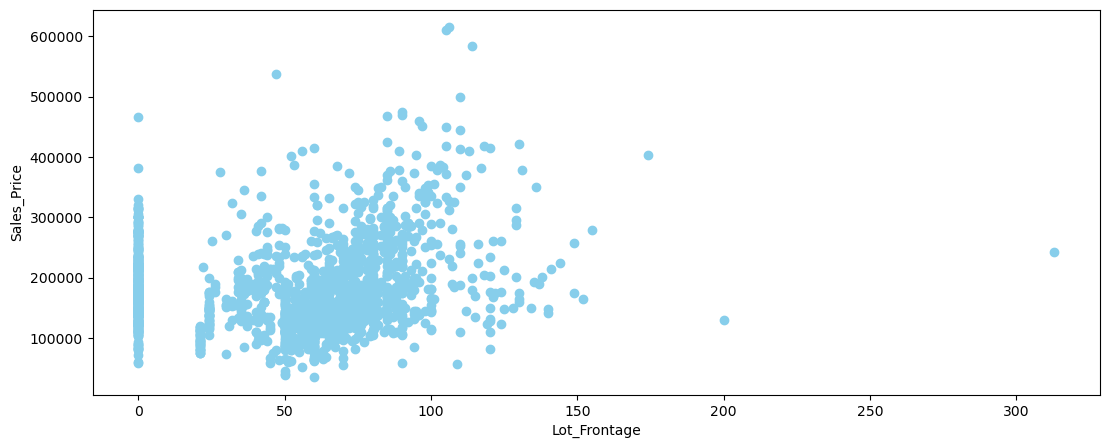

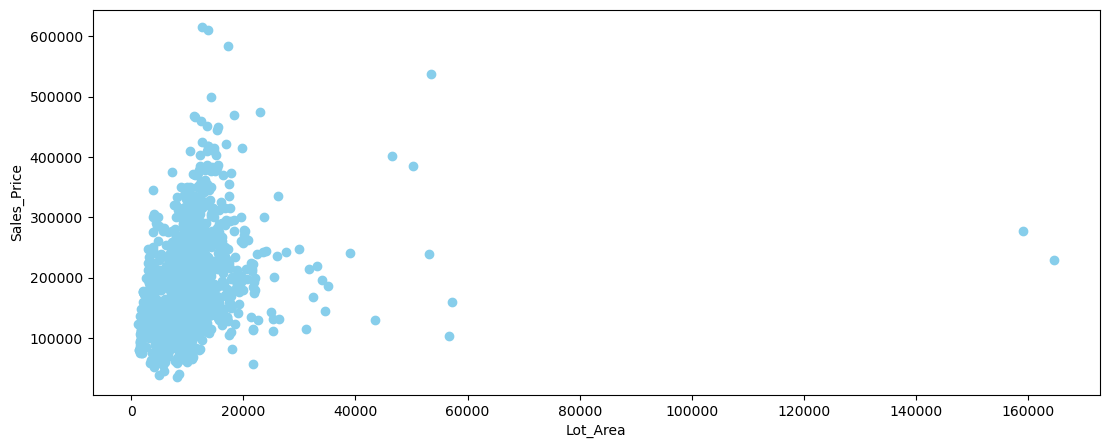

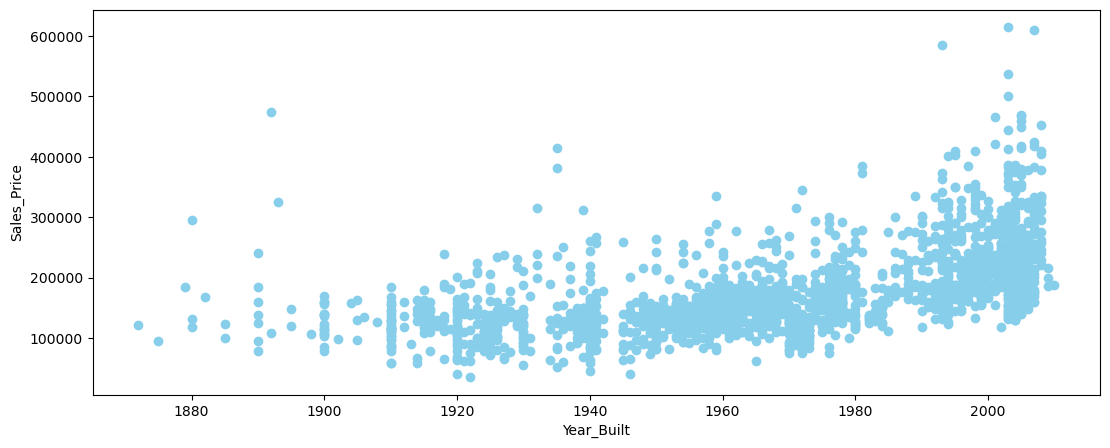

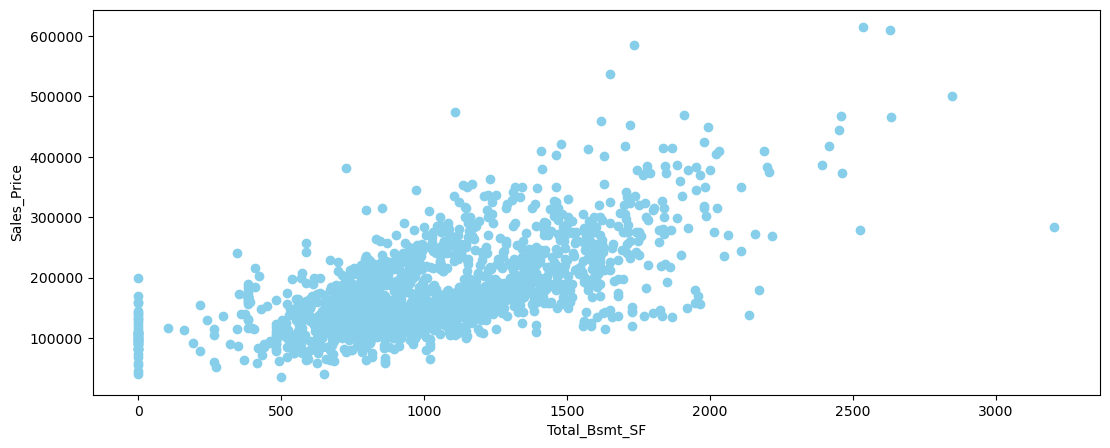

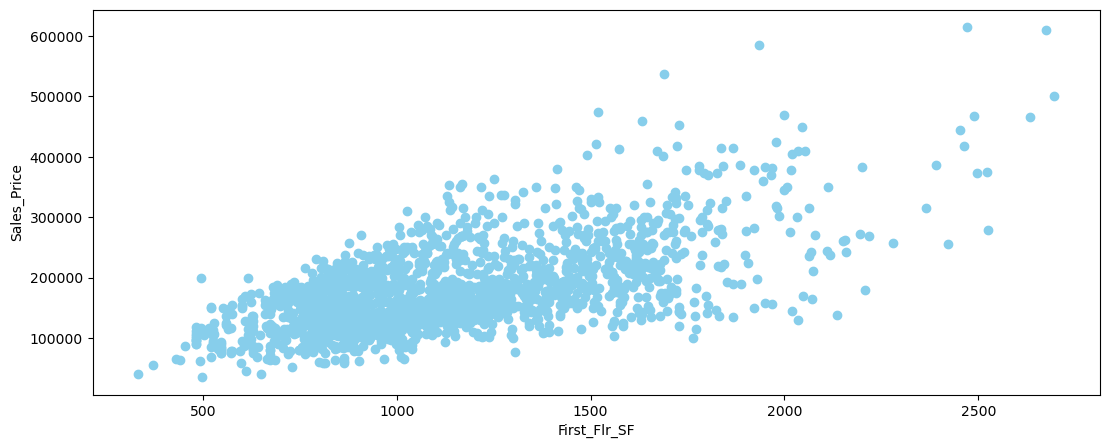

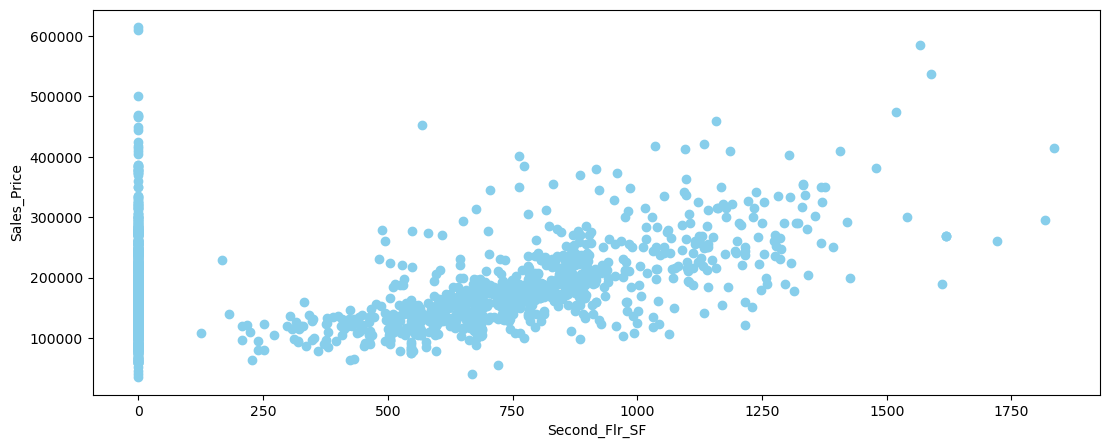

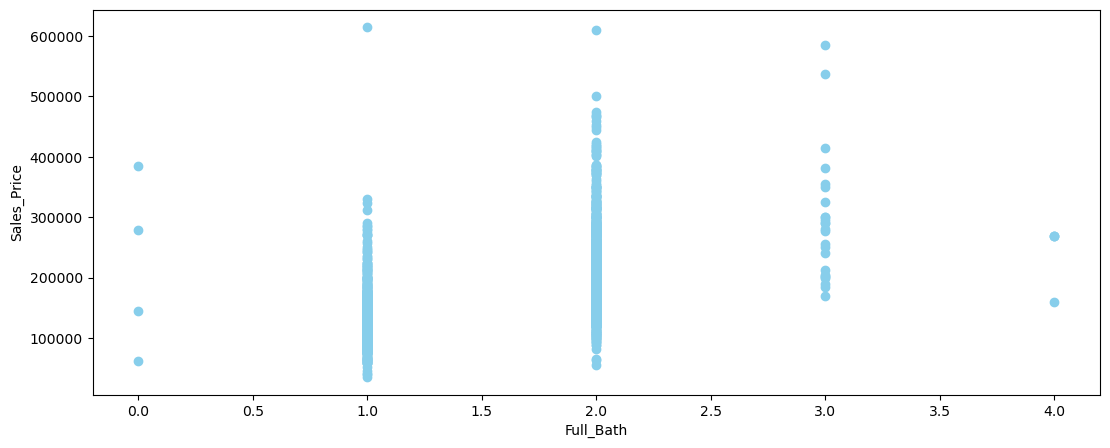

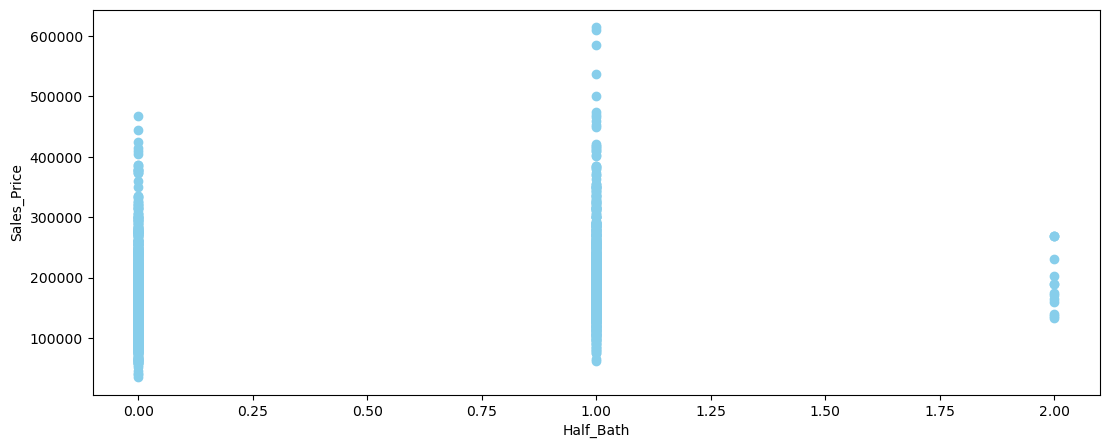

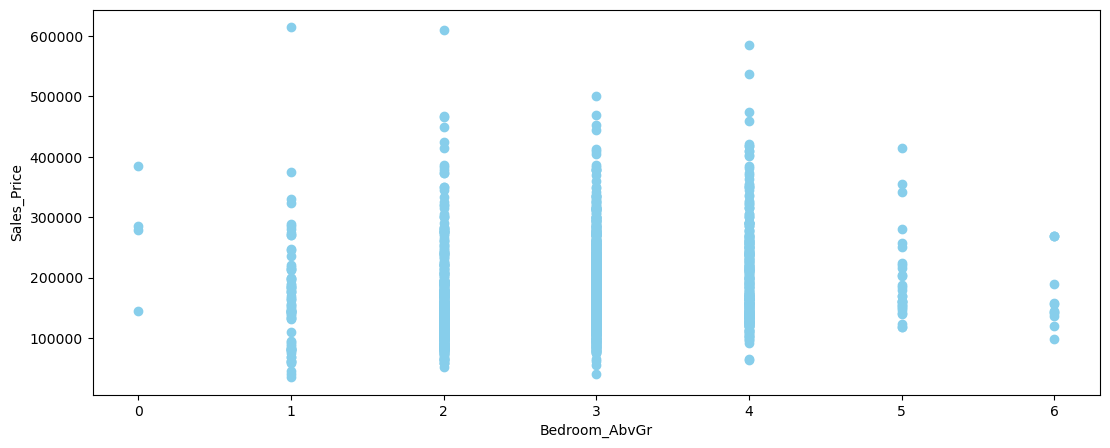

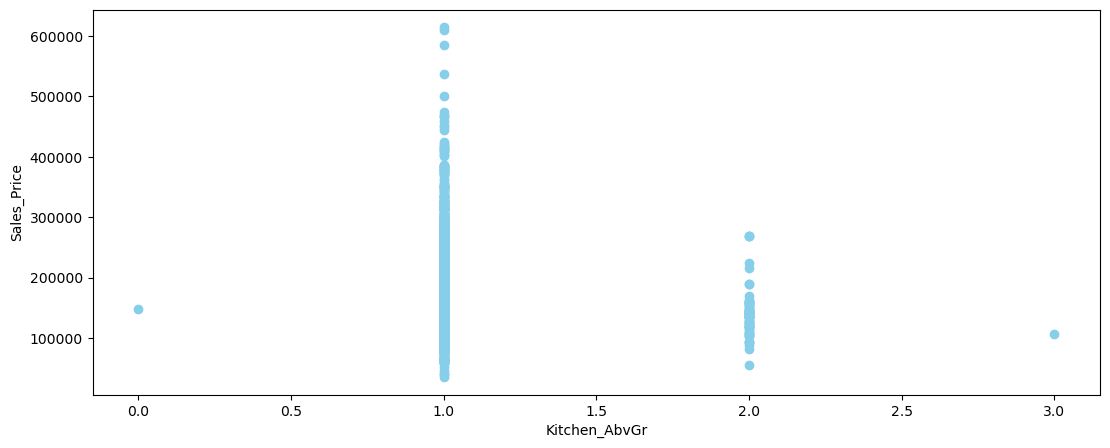

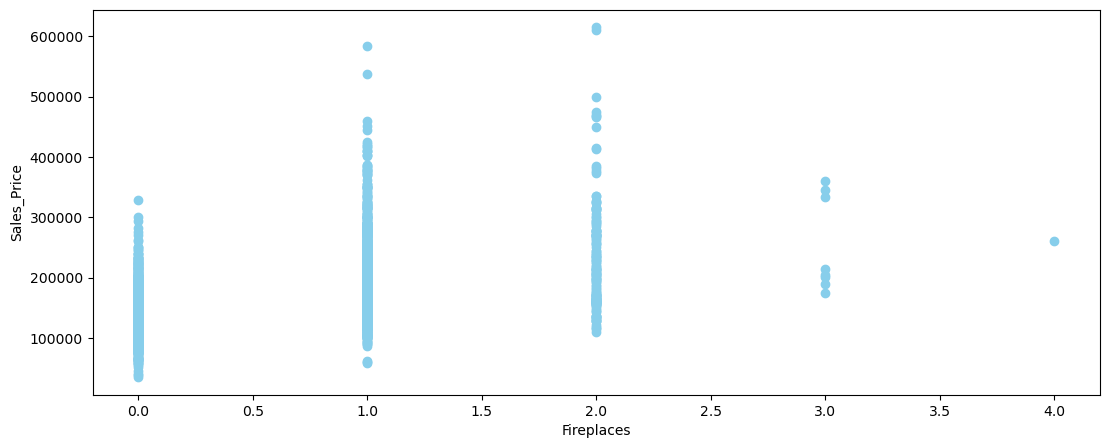

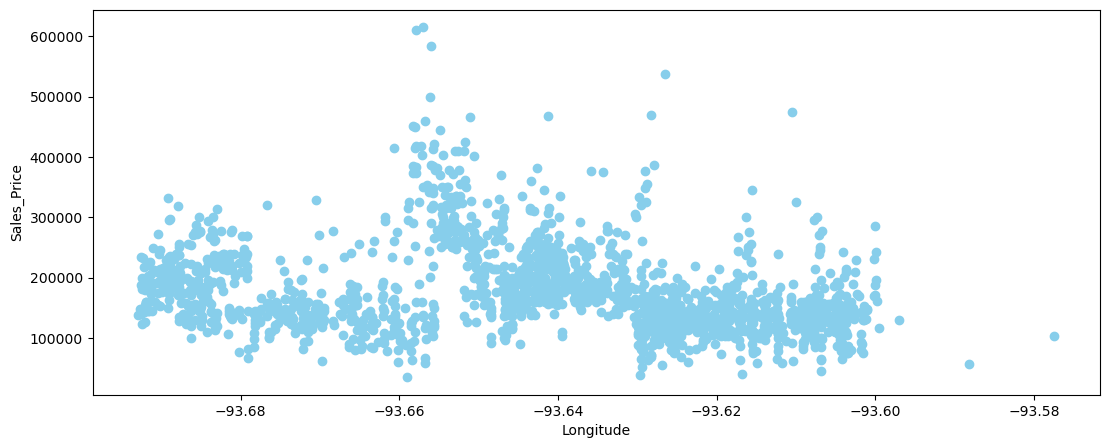

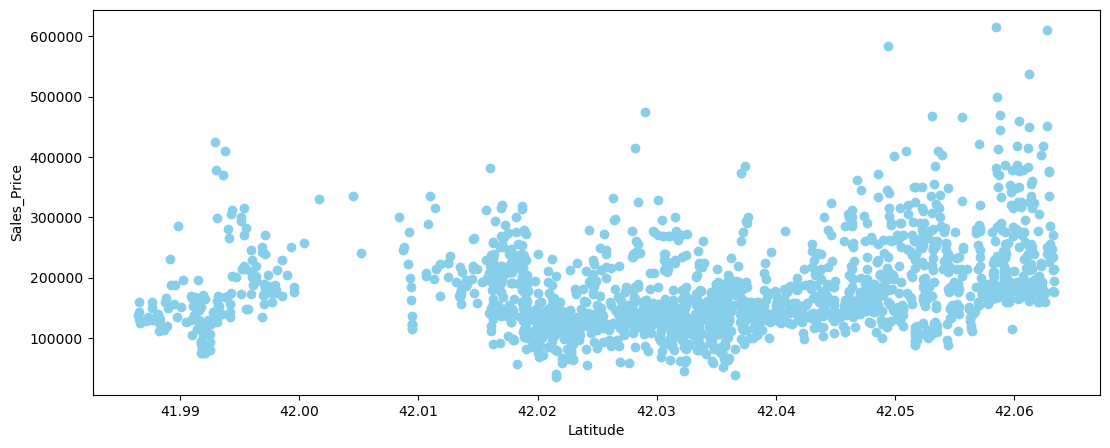

In [18]:
#Scatterplot to find relation between sale price and numerical data
for i in numerical:
    plt.figure(figsize=(13, 5))
    plt.scatter(x_train[i], y_train,color='skyblue')
    plt.ylabel('Sales_Price')
    plt.xlabel(i)
    plt.show()

In [19]:
for i in numerical:
    statistic, p_value = stats.shapiro(x_train[i])
    alpha = 0.05
    if p_value > alpha:
        print(f"The data looks normally distributed (p-value = {p_value})")
    else:
        print(f"The data does not look normally distributed (p-value = {p_value})")

The data does not look normally distributed (p-value = 2.145037389403107e-32)
The data does not look normally distributed (p-value = 0.0)
The data does not look normally distributed (p-value = 3.1323189800417897e-28)
The data does not look normally distributed (p-value = 2.754002206736979e-19)
The data does not look normally distributed (p-value = 1.5580851889664227e-24)
The data does not look normally distributed (p-value = 1.401298464324817e-45)
The data does not look normally distributed (p-value = 0.0)
The data does not look normally distributed (p-value = 0.0)
The data does not look normally distributed (p-value = 9.055541001083049e-39)
The data does not look normally distributed (p-value = 0.0)
The data does not look normally distributed (p-value = 0.0)
The data does not look normally distributed (p-value = 1.5728860930930188e-24)
The data does not look normally distributed (p-value = 6.519317545790693e-23)


## Data Preparation

In [20]:
x_train['Longitude']=np.sin(np.radians(x_train['Longitude']))
x_train['Latitude']=np.sin(np.radians(x_train['Latitude']))

In [21]:
non_zero_values = [x_train['Lot_Frontage'] != 0]
mean = np.mean(non_zero_values)
x_train['Lot_Frontage'][x_train['Lot_Frontage'] == 0] = mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_5764\202727276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Lot_Frontage'][x_train['Lot_Frontage'] == 0] = mean


In [22]:
#Convert the categorical data into numerical data by label encoding
label_encoder = preprocessing.LabelEncoder()
for i in categorical:
    x_train[i]= label_encoder.fit_transform(x_train[i])
    x_test[i]= label_encoder.fit_transform(x_test[i])

In [23]:
#Standardized/normalised the data by min max scaler so all values lies between 0 to 1
min_max= MinMaxScaler()
min_max_train = min_max.fit_transform(x_train)
min_max_test = min_max.fit_transform(x_test)
x_train = pd.DataFrame(min_max_train, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(min_max_test, columns=x_test.columns, index=x_test.index)

In [24]:
#concatenate the columns to remove outliers
merge_train = pd.merge(x_train, y_train, left_index=True, right_index=True)

In [25]:
#concatenate the columns to remove outliers
merge_test = pd.merge(x_test, y_test, left_index=True, right_index=True)

In [26]:
#Remove the outliers by z score having SD greater than 3
z_scores = np.abs(zscore(merge_train[numerical]))
threshold = 3
merge_train = merge_train[(z_scores < threshold).all(axis=1)]

In [27]:
#split the independent and dependent variable
x_train=merge_train.drop(columns=['Sale_Price'])
y_train=merge_train['Sale_Price']

In [28]:
#split the independent and dependent variable
x_test=merge_test.drop(columns=['Sale_Price'])
y_test=merge_test['Sale_Price']

In [29]:
#getting all the columns having value correlation greater than 0.8
matrix = x_train.corr()
col = [matrix.columns[i] for i in range(len(matrix.columns)) for j in range(i) if abs(matrix.iloc[i, j]) >= 0.8]
col

['First_Flr_SF', 'Second_Flr_SF']

In [30]:
#remove the column which is contributing less to Sale_price
x_train.drop(['Second_Flr_SF'],axis=1,inplace=True)
x_test.drop(['Second_Flr_SF'],axis=1,inplace=True)

In [31]:
#Calculating the VIF of each columns to check multicollinearity
variance_inflance_factor = pd.DataFrame()
variance_inflance_factor['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
variance_inflance_factor['variable'] = x_train.columns
variance_inflance_factor

,VIF,variable
0,1.102826,Lot_Frontage
1,1.662356,Lot_Area
2,1.459349,Bldg_Type
3,2.621834,House_Style
4,1.233585,Overall_Cond
5,2.313101,Year_Built
6,1.128187,Exter_Cond
7,3.406118,Total_Bsmt_SF
8,4.152297,First_Flr_SF
9,2.083084,Full_Bath


In [32]:
#remove the column having vif greater than 5
x_train.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
1802,0.147941,0.058276,0.25,0.714286,0.125,0.920290,1.0,0.308172,0.276884,0.50,0.5,0.500000,0.25,0.965568,0.408676
349,0.221615,0.041748,0.25,0.000000,0.625,0.710145,0.5,0.269495,0.224386,0.25,0.0,0.500000,0.00,0.412943,0.869039
1999,0.064657,0.002326,0.50,0.714286,0.125,0.724638,1.0,0.150655,0.063082,0.25,0.5,0.333333,0.25,0.447296,0.847678
1897,0.237631,0.075967,0.25,0.142857,0.125,0.565217,1.0,0.283843,0.243861,0.25,0.5,0.666667,0.00,0.422854,0.455374
1552,0.000000,0.005001,0.50,0.714286,0.125,0.927536,1.0,0.235808,0.184166,0.50,0.5,0.500000,0.25,0.586673,0.775920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.000000,0.073243,0.25,0.000000,0.125,0.942029,1.0,0.489083,0.573666,0.50,0.0,0.500000,0.50,0.254195,0.138282
2005,0.410606,0.094497,0.25,0.000000,0.125,0.956522,1.0,0.617592,0.696867,0.50,0.0,0.500000,0.25,0.702155,0.975185
2105,0.221615,0.043462,0.25,0.000000,0.125,0.695652,1.0,0.328135,0.303980,0.25,0.5,0.500000,0.00,0.430011,0.772540
1295,0.199193,0.077173,0.25,0.000000,0.000,0.492754,1.0,0.310667,0.280271,0.25,0.0,0.500000,0.25,0.826843,0.448779


In [33]:
#apply same eda to test as well
x_test.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
x_test

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
616,0.307692,0.021191,1.00,0.000000,0.250,0.570312,1.000000,0.292500,0.147250,0.333333,0.0,0.333333,0.000000,0.830805,0.580133
1137,0.307692,0.038031,1.00,0.714286,0.125,0.312500,1.000000,0.304063,0.277646,0.666667,0.0,0.666667,0.000000,0.784467,0.544020
524,0.000000,0.056251,0.25,0.000000,0.000,0.593750,0.666667,0.327500,0.381431,0.666667,0.0,0.500000,0.333333,0.731767,0.760688
832,0.456410,0.053458,0.25,0.000000,0.125,0.992188,1.000000,0.506250,0.349497,0.666667,0.0,0.333333,0.333333,0.414178,0.110919
1454,0.123077,0.002554,0.75,0.714286,0.125,0.703125,1.000000,0.196875,0.056771,0.666667,0.5,0.500000,0.000000,0.656175,0.856631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.420513,0.035430,0.25,0.714286,0.125,0.906250,0.666667,0.414062,0.265228,0.666667,0.5,0.666667,0.333333,0.406786,0.858220
1518,0.512821,0.048434,0.25,0.000000,0.125,0.984375,1.000000,0.526563,0.368717,0.666667,0.0,0.333333,0.333333,0.529146,0.856280
1279,0.333333,0.032651,0.25,0.714286,0.125,0.960938,1.000000,0.267500,0.123596,0.666667,0.5,0.500000,0.000000,0.064421,0.357354
995,0.000000,0.053786,0.25,0.000000,0.000,0.640625,1.000000,0.285000,0.140154,0.333333,0.0,0.333333,0.000000,0.180258,0.633765


## Modelling

In [34]:
#apply the ols model
x_train_ols_1 = sm.add_constant(x_train)
model_1 = sm.OLS(y_train, x_train_ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     390.6
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:41:58   Log-Likelihood:                -21165.
No. Observations:                1796   AIC:                         4.236e+04
Df Residuals:                    1780   BIC:                         4.245e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.075e+04   6611.191     -6.164      0.000   -5.37e+04   -2.78e+04
Lot_Frontage   3.994e+04   7750.729      5.152      0.000    2.47e+04    5.51e+04
Lot_Area        2.49e+05   4.15e+04      6.000      0.000    1.68e+05     3.3e+05
Bldg_Type     -3536.6895   5630.135     -0.628      0.530   -1.46e+04    7505.681
House_Style     5.09e+04   3740.133     13.609      0.000    4.36e+04    5.82e+04
Overall_Cond   2.359e+04   3255.363      7.246      0.000    1.72e+04       3e+04
Year_Built     6.471e+04   5422.082     11.934      0.000    5.41e+04    7.53e+04
Exter_Cond    -7484.0675   4280.681     -1.748      0.081   -1.59e+04     911.621
Total_Bsmt_SF  1.586e+05   1.21e+04     13.114      0.000    1.35e+05    1.82e+05
First_Flr_SF   1.437e+05   1.09e+04     13.180      0.000    1.22e+05    1.65e+05
Full_Bath       8.13e+04   8307.988      9.785      0.000     6.5e+04    9.76e+04
Half_Bath      3.732e+04   4256.150      8.769      0.000     2.9e+04    4.57e+04
Bedroom_AbvGr -2.668e+04   7664.323     -3.481      0.001   -4.17e+04   -1.16e+04
Fireplaces     4.701e+04   5777.953      8.136      0.000    3.57e+04    5.83e+04
Longitude      5124.3161   3797.590      1.349      0.177   -2323.888    1.26e+04
Latitude       8998.6499   3387.820      2.656      0.008    2354.126    1.56e+04
==============================================================================
Omnibus:                      399.641   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1794.189
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       7.477   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#drop the column having p vaue greater than 0.05
x_train_ols_1.drop(['Bldg_Type','Exter_Cond','Longitude'],axis=1,inplace=True)
x_test_ols_1=copy.deepcopy(x_test)

In [36]:
#drop the same column from test as well
x_test_ols_1.drop(['Bldg_Type','Exter_Cond','Longitude'],axis=1,inplace=True)
x_test_ols_1.columns

Index(['Lot_Frontage', 'Lot_Area', 'House_Style', 'Overall_Cond', 'Year_Built',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Fireplaces', 'Latitude'],
      dtype='object')

## Interpretation

In [37]:
#apply the same model again
x_train_ols_1 = sm.add_constant(x_train_ols_1)
model_1 = sm.OLS(y_train, x_train_ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     487.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:41:58   Log-Likelihood:                -21167.
No. Observations:                1796   AIC:                         4.236e+04
Df Residuals:                    1783   BIC:                         4.243e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.744e+04   4828.288     -9.825      0.000   -5.69e+04    -3.8e+04
Lot_Frontage   4.036e+04   7668.904      5.263      0.000    2.53e+04    5.54e+04
Lot_Area       2.699e+05   3.81e+04      7.079      0.000    1.95e+05    3.45e+05
House_Style    5.036e+04   3735.278     13.481      0.000     4.3e+04    5.77e+04
Overall_Cond   2.475e+04   3201.255      7.733      0.000    1.85e+04     3.1e+04
Year_Built     6.551e+04   5034.471     13.013      0.000    5.56e+04    7.54e+04
Total_Bsmt_SF  1.582e+05   1.21e+04     13.103      0.000    1.34e+05    1.82e+05
First_Flr_SF   1.424e+05   1.09e+04     13.074      0.000    1.21e+05    1.64e+05
Full_Bath       8.24e+04   8258.445      9.978      0.000    6.62e+04    9.86e+04
Half_Bath      3.775e+04   4253.354      8.875      0.000    2.94e+04    4.61e+04
Bedroom_AbvGr -2.541e+04   7432.140     -3.419      0.001      -4e+04   -1.08e+04
Fireplaces     4.649e+04   5763.204      8.067      0.000    3.52e+04    5.78e+04
Latitude       7812.1933   3340.954      2.338      0.019    1259.595    1.44e+04
==============================================================================
Omnibus:                      403.759   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.773
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       7.565   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#add the same const in test as well
x_test_ols = sm.add_constant(x_test_ols_1)

In [39]:
#getting and print the predicted value
y_pred_1=model_1.predict(x_test_ols)
y_pred_1

616     105019.589526
1137    164666.627678
524     176441.011249
832     246187.829148
1454    150369.433077
            ...      
1507    259870.483537
1518    258369.688975
1279    200656.240533
995      98038.834861
844     165409.971476
Length: 483, dtype: float64

## Evaluation

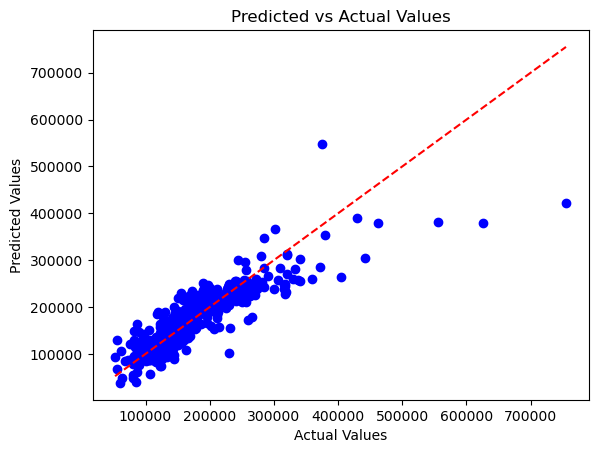

In [40]:
#plot the graph of Actual and Predicted values
plt.scatter(y_test, y_pred_1, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [41]:
#Residual Standard Error
rse_1 = np.sqrt(np.sum((y_test - y_pred_1)**2) / (len(y_test) - 2))
rse_1

38113.05807992543

In [42]:
#Mean Absolute Error
mae_1=metrics.mean_absolute_error(y_test,y_pred_1)
mae_1

25018.359125177885

In [43]:
#Root Mean Squared Error
rmse_1=np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))
rmse_1

38034.067201064616

In [44]:
##apply the linearegression model
model_2 = LinearRegression()
cv_scores = cross_val_score(model_2, x_train, y_train, cv=5, scoring='r2')
cv_scores

array([0.79067126, 0.75869542, 0.76345492, 0.74358426, 0.74782554])

In [45]:
# fitting the model
model_2.fit(x_train, y_train)
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)

Coefficients: [ 39935.03280428 248971.71471058  -3536.68946123  50898.02008344
  23589.34588123  64707.51751196  -7484.06749455 158639.20819767
 143738.72710503  81295.72053203  37324.03342946 -26679.45748394
  47006.74290158   5124.31614808   8998.64987529]
Intercept: -40751.79729045028


In [46]:
#predicted value of y
y_pred_2=model_2.predict(x_test)
y_pred_2

array([103842.4862635 , 162980.11155241, 179701.64355101, 244207.73796259,
       149447.17825674, 157693.16400327, 178049.96361991, 121472.35853955,
       134893.46823095, 164177.93473808,  56911.81903289, 208473.04476674,
       112002.63075263, 165576.96541075, 160589.75796782, 169138.40949507,
       121181.92273754, 206062.99754099, 130603.64059514, 103781.87940583,
       114659.81289097, 204454.81396191, 224568.85941245, 377615.7710184 ,
       157048.54273945, 169012.46517785, 113721.33848336, 232493.67333265,
       162326.17697956, 112858.28523263, 214702.31444231, 159614.32025794,
       201138.13711739, 151203.19403222, 110096.23091587, 201323.07229953,
       207438.70116037, 191756.64785546, 264887.95347651, 226276.82078903,
        99662.29631926, 145875.90125918, 209980.77601023, 139593.03411226,
       230964.23466787, 239133.87506897, 239375.51257085, 183940.1760149 ,
       103729.42189605, 242592.3659875 , 153417.58489536, 124102.50399951,
       120725.04180599, 1

In [47]:
#Getting the R2
r2 = r2_score(y_test, y_pred_2)
r2

0.7389848440530231

In [48]:
#Residual Standard Error
rse_2 = np.sqrt(np.sum((y_test - y_pred_2)**2) / (len(y_test) - 2))
rse_2

38009.07157125737

In [49]:
#Mean Absolute Error
mae_2=metrics.mean_absolute_error(y_test,y_pred_2)
mae_2

24898.521348841132

In [50]:
#Root Mean Squared Error
rmse_2=np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))
rmse_2

38034.067201064616

In [51]:
#apply the lasso regression
model_3 = Lasso(alpha=0.1)
model_3.fit(x_train, y_train)
coefficients = model_3.coef_
coefficients

array([ 39931.15219338, 248712.2138364 ,  -3543.46451914,  50894.98396441,
        23586.65873847,  64706.28977408,  -7482.11610485, 158628.93532345,
       143754.99012913,  81291.77130839,  37324.32387345, -26658.44916367,
        47009.33127283,   5125.96937972,   8996.39938753])

In [52]:
#predict the y_values
y_pred_3=model_3.predict(x_test)
y_pred_3

array([103840.4676948 , 162979.89960322, 179702.72133772, 244202.67493525,
       149451.34033818, 157691.74849841, 178050.12343786, 121474.16709796,
       134892.31620109, 164186.0795871 ,  56915.84145682, 208486.63712668,
       112007.54354933, 165577.78819446, 160588.92334256, 169141.56208284,
       121182.76758059, 206064.08340547, 130606.04586   , 103778.87351833,
       114669.78296259, 204448.50533181, 224550.20005012, 377612.31046033,
       157049.58399024, 169013.86323008, 113723.26400605, 232486.55818455,
       162320.96154239, 112862.64556847, 214710.31379716, 159606.81409848,
       201134.68034887, 151206.23048198, 110093.31215885, 201320.73333778,
       207441.35058154, 191756.98828183, 264890.17561694, 226272.73028136,
        99666.58274917, 145875.93530848, 209979.80963369, 139589.69103478,
       230965.23403222, 239133.42599306, 239370.38684252, 183944.69899218,
       103733.33903804, 242589.01778989, 153419.8277223 , 124105.31595005,
       120718.93001017, 1

In [53]:
#getting the R2
r3 = r2_score(y_test, y_pred_3)
r3

0.7390073749608198

In [54]:
#Residual Standard Error
rse_3 = np.sqrt(np.sum((y_test - y_pred_3)**2) / (len(y_test) - 2))
rse_3

38007.43105853423

In [55]:
#Mean Absolute Error
mae_3=metrics.mean_absolute_error(y_test,y_pred_2)
mae_3

24898.521348841132

In [56]:
#Root Mean Squared Error
rmse_3=np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))
rmse_3

38034.067201064616

In [57]:
#residual which is actual-predicted
residuals = y_test-y_pred_1
residuals

616    -12019.589526
1137   -34666.627678
524      1183.988751
832     69312.170852
1454   -44369.433077
            ...     
1507    70129.516463
1518    -5369.688975
1279     7843.759467
995     45961.165139
844     -3409.971476
Length: 483, dtype: float64

## Gauss Markov assumptions

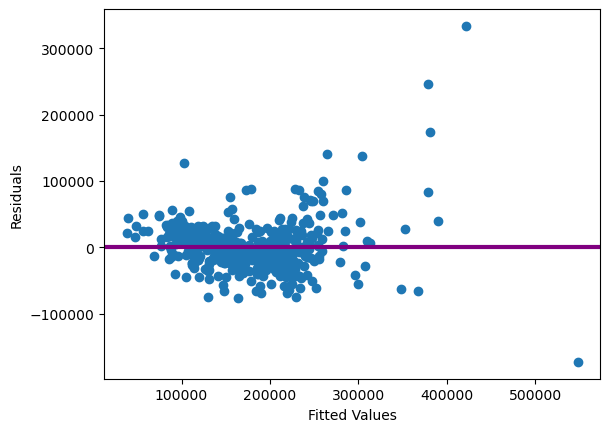

In [58]:
#check the linearity
plt.scatter(y_pred_1, residuals)
plt.xlabel('Fitted Values')
plt.axhline(y=0, color='purple', linestyle='-', linewidth=3)
plt.ylabel('Residuals')
plt.show()

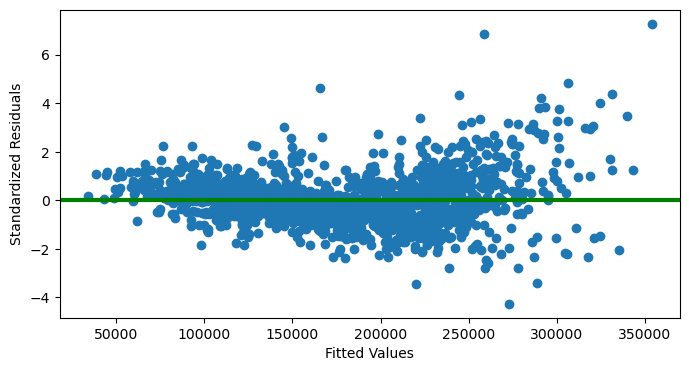

In [59]:
#checking the homosedacity by graphical method
standardized_residuals = model_1.get_influence().resid_studentized_internal
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(model_1.fittedvalues, standardized_residuals)
ax.axhline(y=0, color='green', linestyle='-', linewidth=3)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Standardized Residuals')
plt.show()

In [60]:
#checking the homosedacity by stats method
residuals = model_1.resid
_, p_value, _, _ = het_breuschpagan(residuals, x_train_ols_1)
print(f'p-value: {p_value}')
if p_value < 0.05:
    print('Heteroscedasticity')
else:
    print('Homoscedasticity')

p-value: 1.7653275551987445e-54
Heteroscedasticity


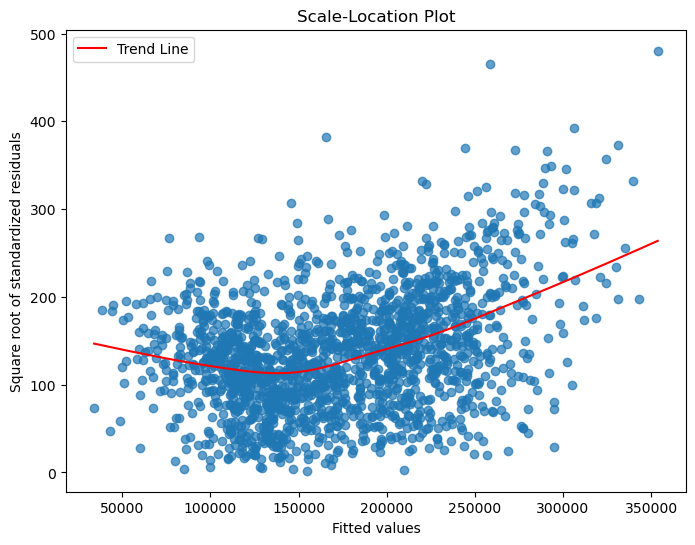

In [61]:
#Scale-location plot for homosedacity
sqrt_res = np.sqrt(np.abs(residuals))
plt.figure(figsize=(8, 6))
plt.scatter(model_1.fittedvalues, sqrt_res, alpha=0.7)
plt.xlabel('Fitted values')
plt.ylabel('Square root of standardized residuals')
plt.title('Scale-Location Plot')
lowess = sm.nonparametric.lowess
smoothed = lowess(sqrt_res, model_1.fittedvalues)
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', label='Trend Line')
plt.legend()
plt.show()

In [62]:
#checking the autocorelation between errors 
durbin_watson = sm.stats.stattools.durbin_watson(model_1.resid)
print(durbin_watson)
if durbin_watson < 1.5 or durbin_watson> 2.5:
    print('significant autocorrelation')
else:
    print('No significant autocorrelation')

2.034685631191295
No significant autocorrelation


In [63]:
#checking the influencial observations
ols_influence = OLSInfluence(model_1)
cook_distance = ols_influence.cooks_distance[0]
cook_distance

1802    3.315640e-05
349     9.298731e-08
1999    4.885513e-04
1897    1.493275e-04
1552    1.288517e-05
            ...     
1357    3.981802e-04
2005    6.490432e-05
2105    5.518091e-05
1295    1.250703e-04
1013    6.959776e-07
Length: 1796, dtype: float64

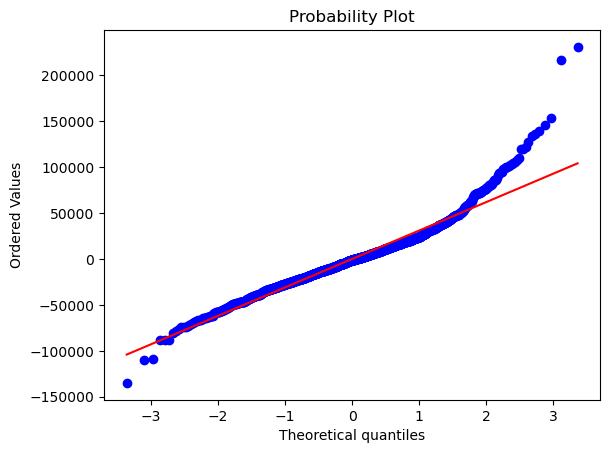

In [64]:
#residuals are normal or not
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

In [65]:
#checking the normality of residuals by statistical approach
statistic, p_value = shapiro(residuals)
if p_value > 0.05:
    print("Normally distributed")
else:
    print("Not normally distributed")

Not normally distributed
